<h1 style="color:#1B998B;font-size:65px;font-family:Georgia;text-align:center;"><strong>Đồ án</strong></h1>
<h1 style="color:#1B998B;font-size:60px;font-family:Georgia;text-align:center;"><strong>Môn học phân tích dữ liệu và dữ báo</strong></h1>
<h2 style="color:#1B998B;font-size:60px;font-family:Georgia;text-align:center;"><strong>Credit Card Fraud Detection</strong></h2>
<h5 style="color:#1B998B;font-family:Georgia;text-align:center;"><strong>(Phát hiện giao dịch thẻ tín dụng gian lận)</strong></h5>

##### <b>Nhóm 9</b>
##### <b>Hoàng Lê Quốc Đạt - 2001202037</b>
##### <b>2</b>
##### <b>3</b> 
##### <b>Giáo viên hướng dẫn: Thầy Đinh Nguyễn Trọng Nghĩa</b>

<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Danh mục</strong></h1>

### 1. [Chuẩn bị dữ liệu](#1)
### 2. [Mục đích và yêu cầu của khách hàng](#2)
### 3. [Quản Lý dữ liệu](#3)
### 4. [Phân tích mối quan hệ](#4)
### 5. [Xây dựng mô hình hồi quy](#5)
### 6. [Xây dựng mô hình cây quyết định](#6)
### 7. [So sánh các mô hình](#7)
### 8. [Báo cáo khách hàng](#8)


<a id="1"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Chuẩn bị dữ liệu</strong></h1>
<hr>

<p style="list-style-type:circle;font-size:20px">Một công ty thẻ tín dụng lớn, đang gặp thách thức với hệ thống phát hiện gian lận hiện tại của họ. Hệ thống hiện tại có tốc độ phản hồi chậm trong việc nhận ra các mô hình gian lận mới, dẫn đến tổn thất tài chính đáng kể. Để giải quyết vấn đề này, họ đã ký hợp đồng với chúng tôi để thiết kế và triển khai một thuật toán có thể xác định và đánh dấu hiệu quả các giao dịch tiềm ẩn gian lận để điều tra thêm. Dữ liệu được cung cấp bao gồm hai bảng: "cc_info", chứa thông tin chung về thẻ tín dụng và chủ thẻ, và "transactions", chứa chi tiết về các giao dịch thẻ tín dụng diễn ra từ ngày 1 tháng 8 đến ngày 30 tháng 10</p>


<a id="1.2"></a>
#### ️🎯 1.2 Import thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.cluster import KMeans
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

<a id="1.3"></a>
#### ️🎯 1.3 Đọc dữ liệu tập dữ liệu cc_info.csv

In [3]:
cc_info = pd.read_csv('cc_info.csv')

In [4]:
cc_info.head()

credit_card      city state  zipcode  credit_card_limit
0  1280981422329509    Dallas    PA    18612               6000
1  9737219864179988   Houston    PA    15342              16000
2  4749889059323202    Auburn    MA     1501              14000
3  9591503562024072   Orlando    WV    26412              18000
4  2095640259001271  New York    NY    10001              20000

In [5]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [5]:
cc_info.shape

(984, 5)

In [11]:
print(cc_info.describe())

        credit_card       zipcode  credit_card_limit
count  9.840000e+02    984.000000         984.000000
mean   5.410432e+15  17895.316057       12321.138211
std    2.545234e+15  23778.651105        7398.449174
min    1.003715e+15    690.000000        2000.000000
25%    3.316062e+15   3280.000000        7000.000000
50%    5.365218e+15   5820.000000       10000.000000
75%    7.562153e+15  18101.250000       16000.000000
max    9.999757e+15  98401.000000       55000.000000


In [12]:
#kiểm tra dữ liệu bị thiếu
cc_info_missing = cc_info.isnull().sum()
print(cc_info_missing)

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64


In [13]:
#kiểm tra dữ liệu có chứa giá trị NaN không?
cc_info_Nan = cc_info.isna().sum()
print(cc_info_Nan)

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64


Kết luận ở tập dữ liệu thứ nhất:
 - Sơ bộ thì dữ liệu khá là sạch sẽ, dữ liệu có 984 dòng, 5 cột.
 - dữ liệu không có bị thiếu và cũng không chứ các giá trị NaN.


<a id="1.4"></a>
#### ️🎯 1.4 Đọc dữ liệu tập dữ liệu transaction.csv

In [5]:
transaction = pd.read_csv('transactions.csv')

In [6]:
transaction.head()

credit_card                 date  transaction_dollar_amount  \
0  1003715054175576  2015-09-11 00:32:40                      43.78   
1  1003715054175576  2015-10-24 22:23:08                     103.15   
2  1003715054175576  2015-10-26 18:19:36                      48.55   
3  1003715054175576  2015-10-22 19:41:10                     136.18   
4  1003715054175576  2015-10-26 20:08:22                      71.82   

        Long        Lat  
0 -80.174132  40.267370  
1 -80.194240  40.180114  
2 -80.211033  40.313004  
3 -80.174138  40.290895  
4 -80.238720  40.166719

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


In [16]:
transaction.shape

(294588, 5)

In [17]:
transaction.describe()

credit_card  transaction_dollar_amount           Long            Lat
count  2.945880e+05              294588.000000  294588.000000  294588.000000
mean   5.424562e+15                  86.007693     -76.235238      40.937669
std    2.555803e+15                 124.655989      20.135015       5.391695
min    1.003715e+15                   0.010000    -179.392887     -68.046553
25%    3.344214e+15                  29.970000     -80.209708      40.487726
50%    5.353426e+15                  58.470000     -73.199737      42.403066
75%    7.646245e+15                 100.400000     -72.091933      43.180015
max    9.999757e+15                 999.970000     179.917513      78.914330

In [18]:
#kiểm tra dữ liệu có bị thiếu không?
transaction_missing = transaction.isnull().sum()
transaction_missing

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [19]:
#kiểm tra dữ liệu có chứa giá trị NaN. không ?
transaction_Nan = transaction.isna().sum()
transaction_missing

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

#### Kết Luận:
- Ở tập dữ liệu thứ 2 có kích thước lớn hơn so với tập dữ liệu thứ nhất. Dữ liệu có 294588 dong , 5 cột dữ liệu.
- Cũng không có giá trị bị thiếu và Cũng không chứa giá trị NaN

<a id="1.5"></a>
#### ️🎯 1.5 Gộp 2 tập dữ liệu

 **Vì là cùng chung một vấn đề là đi phân tích dữ liệu về gian lận trong giao dịch cảu thẻ tín dụng
-> Nên sẽ gộp 2 dữ liệu này lại thành một thông qua biến chung là 'credit_card'**

In [6]:
#sử dụng merge để kết hợp dữ liệu thành 1
df = pd.merge(cc_info, transaction, on='credit_card')
#lưu lại tập dữ liệu đã gộp
df.to_csv('credit_card_merged.csv', index = False)

In [6]:
#đọc dữ liệu
df = pd.read_csv('credit_card_merged.csv')

In [29]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

                  date  transaction_dollar_amount       Long        Lat  
0  2015-08-05 00:59:19                      11.94 -75.964527  41.353578  
1  2015-10-29 18:23:04                       5.76 -76.019703  41.311467  
2  2015-10-25 17:50:48                      25.84 -76.043031  41.291053  
3  2015-09-05 17:39:43                      68.89 -75.944299  41.327282  
4  2015-09-04 14:12:59                      27.01 -75.997259  41.352099

In [11]:
df.shape

(294588, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   city                       294588 non-null  object 
 2   state                      294588 non-null  object 
 3   zipcode                    294588 non-null  int64  
 4   credit_card_limit          294588 non-null  int64  
 5   date                       294588 non-null  object 
 6   transaction_dollar_amount  294588 non-null  float64
 7   Long                       294588 non-null  float64
 8   Lat                        294588 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


Kiểu dữ liệu:
* Cột thuộc tính int64: `card_id`, `credit_card_limit`,`zipcode`
* Cột thuộc tính object: `city`, `state`, `date`
* Cột thuộc tính float64: `longitude`, `latitude`,`transaction_dollar_amount`  

In [28]:
soLuongChuThe = df['credit_card'].nunique()
print("Số lượng chủ thẻ:", soLuongChuThe)

Số lượng chủ thẻ: 984


In [30]:
df.describe(include='all')

credit_card        city   state        zipcode  credit_card_limit  \
count   2.945880e+05      294588  294588  294588.000000      294588.000000   
unique           NaN         124      35            NaN                NaN   
top              NaN  Washington      NH            NaN                NaN   
freq             NaN      112693  118247            NaN                NaN   
mean    5.424562e+15         NaN     NaN   18073.772516       15502.053716   
std     2.555803e+15         NaN     NaN   23945.510551        7956.291556   
min     1.003715e+15         NaN     NaN     690.000000        2000.000000   
25%     3.344214e+15         NaN     NaN    3280.000000       10000.000000   
50%     5.353426e+15         NaN     NaN    5820.000000       15000.000000   
75%     7.646245e+15         NaN     NaN   18612.000000       20000.000000   
max     9.999757e+15         NaN     NaN   98401.000000       55000.000000   

                       date  transaction_dollar_amount           Long  \
count                294588              294588.000000  294588.000000   
unique               281065                        NaN            NaN   
top     2015-10-10 20:46:39                        NaN            NaN   
freq                      4                        NaN            NaN   
mean                    NaN                  86.007693     -76.235238   
std                     NaN                 124.655989      20.135015   
min                     NaN                   0.010000    -179.392887   
25%                     NaN                  29.970000     -80.209708   
50%                     NaN                  58.470000     -73.199737   
75%                     NaN                 100.400000     -72.091933   
max                     NaN                 999.970000     179.917513   

                  Lat  
count   294588.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        40.937669  
std          5.391695  
min        -68.046553  
25%         40.487726  
50%         42.403066  
75%         43.180015  
max         78.914330

In [8]:
df = pd.DataFrame(df)
print(df)

             credit_card     city state  zipcode  credit_card_limit  \
0       1280981422329509   Dallas    PA    18612               6000   
1       1280981422329509   Dallas    PA    18612               6000   
2       1280981422329509   Dallas    PA    18612               6000   
3       1280981422329509   Dallas    PA    18612               6000   
4       1280981422329509   Dallas    PA    18612               6000   
...                  ...      ...   ...      ...                ...   
294583  1409322756311484  Houston    PA    15342              15000   
294584  1409322756311484  Houston    PA    15342              15000   
294585  1409322756311484  Houston    PA    15342              15000   
294586  1409322756311484  Houston    PA    15342              15000   
294587  1409322756311484  Houston    PA    15342              15000   

                       date  transaction_dollar_amount       Long        Lat  
0       2015-08-05 00:59:19                      11.94 -75.964527  4

<a id="1.6"></a>
#### ️🎯 1.6 Tìm hiểu dữ liệu

### *Tập dữ liệu chứa thông tin về các giao dịch của các thẻ tín dụng trong 2 tháng*
#### Gồm có 2 file là cc_info.csv và transactions.csv
##### *cc_info.csv*  gồm các thuộc tính sau:
* credit_card : mã số thẻ tín dụng
* city : thành phố
* state : bang
* zipcode : mã bưu chính
##### *transactions.csv* gồm các thuộc tính sau:
* credit_card : mã số thẻ tín dụng
* date : ngày giao dịch
* transaction_dollar_amount : số tiền giao dịch
* Long : tọa độ kinh độ
* Lat : tọa độ vĩ độ
#### Kiểu dữ liệu của các thuộc tính
* credit_card có kiểu dữ liệu là int64
* city có kiểu dữ liệu là object  
* state có kiểu dữ liệu là object
* zipcode có kiểu dữ liệu là int64 
* credit_card_limit có kiểu dữ liệu là int64
* date có kiểu dữ liệu là object
* transaction_dollar_amount có kiểu dữ liệu là float64
* Long có kiểu dữ liệu là float64
* Lat có kiểu dữ liệu là float64
> #### Biến định lượng
* transaction_dollar_amount
* credit_card_limit
* Long
* Lat
> #### Biến phân loại
* credit_card
* city
* state
* zipcode
* date


> #### Tổng quan về tập dữ liệu
* file cc_info.csv có 984 dòng và 5 cột
* file transactions.csv có 294588 dòng và 5 cột
* Bộ dữ liệu chứa giao dịch trên phạm vi nước Mỹ
* Có 984 chủ thẻ
* Chủ thẻ thuộc trong 124 city và 35 state của Mỹ
* Có 294588 giao dịch được thực hiện
* Giá trị trung bình mỗi lần giao dịch là 86 USD
* Giao dịch cao nhất là 999.97 USD

<a id="2"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 2. Mục đích và yêu cầu của khách hàng</strong></h1>
<hr>

<a id="2.1"></a>
#### ️🎯 2.1 Mục đích của khách hàng

Vì công ty tài chính của khách hàng đang phải đối mặt với những thách thức với hệ thống phát hiện gian lận hiện tại của họ, hệ thống hiện tại phản ứng chậm trong việc nhận ra các kiểu gian lận mới, dẫn đến tổn thất tài chính đáng kể, mục đích của họ là muốn phát hiện và xác định các dấu hiệu các giao dịch có khả năng gian lận để điều tra thêm.

<a id="2.2"></a>
#### ️🎯 2.2 Yêu cầu của khách hàng

Yêu cầu của khách hàng là xây dựng một hệ thống phát hiện gian lận tiên tiến sử dụng mạng lưới nơ-ron thần kinh để xác định các giao dịch có vẻ bất thường và có khả năng gian lận.

<a id="2.3"></a>
#### ️🎯 2.3 Những giả thuyết cần thiết

1. Giả thuyết về mối quan hệ giữa thành phố và mức giới hạn thẻ tín dụng: Giả sử rằng mức giới hạn thẻ tín dụng có sự khác biệt giữa các thành phố hoặc khu vực.
2. Giả thuyết về mối quan hệ giữa thuộc tính Credit_card_limit và Transaction_amount. Các giao dịch có tổng tiền giao dịch trên một tháng cao hơn mức giới hạn thẻ tín dụng sẽ có khả năng là giao dịch gian lận hay không.
3. Các chủ thẻ có số lượng giao dịch lớn hơn mức trung bình trong một ngày có khả năng là gian lận hay không? 
4. Các giao dịch có giá trị (transaction_dollar_amount) lớn hơn mức trung bình của một state có khả năng là gian lận hay không?
5. state có tổng số tiền giao dịch cao hoặc thấp thì khả năng gian lận sẽ tập trung vào cao hay thấp.
6. Những chủ thẻ có giá trị credit_card_limit cao sẽ có số lần giao dịch nhiều hay không
7. Những chủ thẻ có giá trị credit_card_limit cao sẽ có số tổng giá trị giao dịch 

<a id="3"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 3. Quản lý dữ liệu</strong></h1>
<hr>

<a id="3.1"></a>
#### ️🎯 3.1 Làm sách dữ liệu

In [9]:
# Kiểm tra giá trị không hợp lệ
invalid_values = df[(df['credit_card_limit'] < 0) | (df['transaction_dollar_amount'] < 0)]
print("\nDanh sách các bản ghi có giá trị không hợp lệ:")
print(invalid_values)


Danh sách các bản ghi có giá trị không hợp lệ:
Empty DataFrame
Columns: [credit_card, city, state, zipcode, credit_card_limit, date, transaction_dollar_amount, Long, Lat]
Index: []


In [34]:
# Kiểm tra trùng lặp
duplicate_records = df[df.duplicated()]
print("\nDanh sách các bản ghi bị trùng lặp:")
print(duplicate_records) # 


Danh sách các bản ghi bị trùng lặp:
Empty DataFrame
Columns: [credit_card, city, state, zipcode, credit_card_limit, date, transaction_dollar_amount, Long, Lat]
Index: []


Kiểm tra giá trị không hợp lệ tại cột state

In [10]:
unique_states = df['state'].unique()
print(unique_states)


['PA' 'MA' 'WV' 'NY' 'NJ' 'NH' 'CA' 'CO' 'IN' 'IL' 'TX' 'WA' 'VT' 'MO'
 'OK' 'NM' 'MD' 'IA' 'ME' 'PR' 'LA' 'MI' 'UT' 'OH' 'RI' 'VA' 'HI' 'AL'
 'FL' 'NC' 'CT' 'GA' 'KS' 'AZ' 'ID']


* Giá trị PR không hợp lệ. Vì PR không phải là một bang tại Hoa Kỳ \
-> Xóa dữ liệu tại `state` có giá trị là PR

In [7]:
df = df[df['state'] != 'PR']

#### Xử lý các giá trị ngoại lai
Chỉ kiểm tra trên thuộc tính transaction_dollar_amount và credit_card_limit vì đây là giá trị nhập xuất
> Sẽ có 2 trường hợp
> 1. Tỉ lệ phần trăm của các giá trị ngoại lai nhỏ hơn 5% thì ta sẽ giữ lại có giá trị ngoại lai trong thuộc tính đó vi nó không ảnh hưởng nhiều đến tập dữ liệu
> 2.  Tỉ lệ phần trăm của các giá trị ngoại lai lớn hơn 5% thì ta sẽ loại bỏ các giá trị ngoại lai trong thuộc tính đó


Hàm tính outliers

In [12]:
def detect_outliers_IQR(data):
   #Calculate the Q1:
   Q1 = np.percentile(data, 25)
   #Calculate the Q3:
   Q3 = np.percentile(data, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(data >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(data <= (Q1-1.5*IQR))
   #Outliers
   outliers = data[((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **Xem xét thuộc tính `credit_card_limit`**

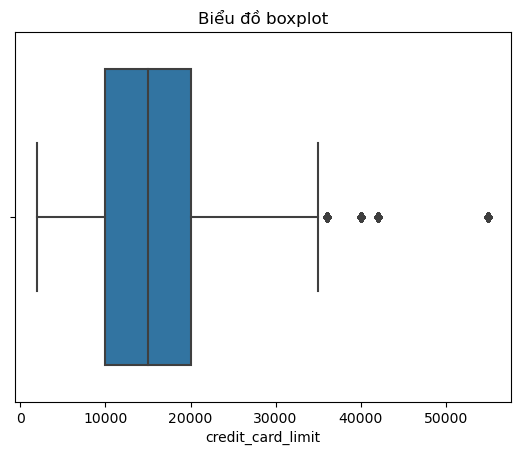

In [13]:
# Vẽ biểu đồ boxplot cho một biến số
sns.boxplot(x='credit_card_limit', data=df)
plt.title('Biểu đồ boxplot')
plt.show()

In [14]:
outliers, upper, lower = detect_outliers_IQR(df['credit_card_limit'])

print("số lượng outliers: "+ str(len(outliers)))

print("giá trị max outliers: "+ str(outliers.max()))

print("giá trị min outliers: "+ str(outliers.min()))

print("tỉ lệ outliers: "+ str(len(outliers)/len(df) * 100))

số lượng outliers: 5857
giá trị max outliers: 55000
giá trị min outliers: 36000
tỉ lệ outliers: 2.0081464160569427


In [18]:
# # Calculate the IQR
# Q1 = df['credit_card_limit'].quantile(0.25)
# Q3 = df['credit_card_limit'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper and lower bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove the outliers
# df = df[(df['credit_card_limit'] >= lower_bound) & (df['credit_card_limit'] <= upper_bound)]


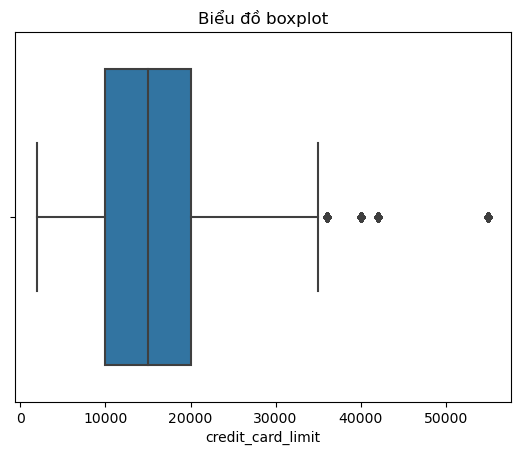

In [15]:
# Vẽ biểu đồ boxplot cho một biến số
sns.boxplot(x='credit_card_limit', data=df)
plt.title('Biểu đồ boxplot')
plt.show()

> **Xem xét thuộc tính `transaction_dollar_amount`**

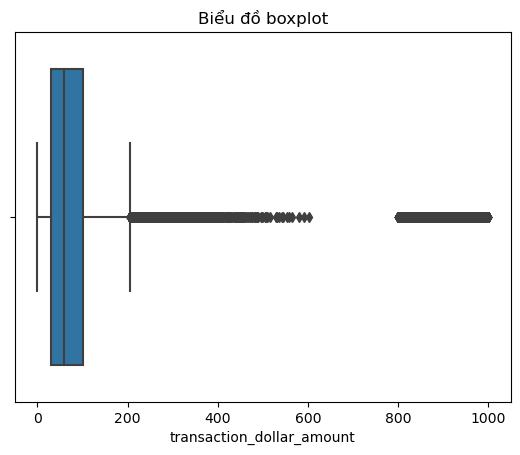

In [16]:
# Vẽ biểu đồ boxplot cho một biến số
sns.boxplot(x='transaction_dollar_amount', data=df)
plt.title('Biểu đồ boxplot')
plt.show()

In [17]:
outliers, upper, lower = detect_outliers_IQR(df['transaction_dollar_amount'])

print("số lượng outliers: "+ str(len(outliers)))

print("giá trị max outliers: "+ str(outliers.max()))

print("giá trị min outliers: "+ str(outliers.min()))

print("tỉ lệ outliers: "+ str(len(outliers)/len(df) * 100))

số lượng outliers: 13378
giá trị max outliers: 999.97
giá trị min outliers: 205.82
tỉ lệ outliers: 4.586816246202796


In [40]:
# # Calculate the IQR
# Q1 = df['transaction_dollar_amount'].quantile(0.25)
# Q3 = df['transaction_dollar_amount'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper and lower bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove the outliers
# df = df[(df['transaction_dollar_amount'] >= lower_bound) & (df['transaction_dollar_amount'] <= upper_bound)]

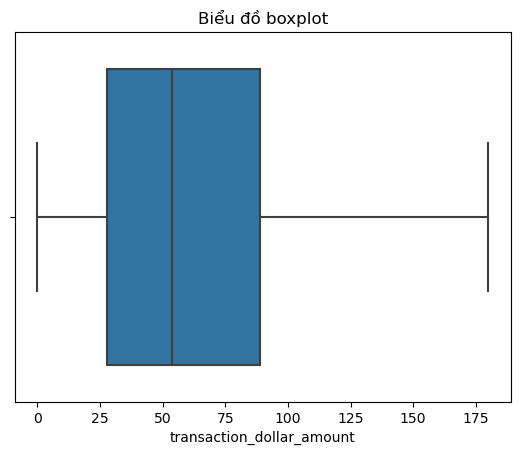

In [41]:
# Vẽ biểu đồ boxplot cho một biến số
sns.boxplot(x='transaction_dollar_amount', data=df)
plt.title('Biểu đồ boxplot')
plt.show()

In [42]:
outliers, upper, lower = detect_outliers_IQR(df['transaction_dollar_amount'])

print("số lượng outliers: "+ str(len(outliers)))

print("giá trị max outliers: "+ str(outliers.max()))

print("giá trị min outliers: "+ str(outliers.min()))

print("tỉ lệ outliers: "+ str(len(outliers)/len(df) * 100))

số lượng outliers: 0
giá trị max outliers: nan
giá trị min outliers: nan
tỉ lệ outliers: 0.0


<a id="3.2"></a>
#### ️🎯 3.2 Tạo biến phụ

In [8]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Perform date and time extraction
df['date_only'] = df['date'].dt.strftime("%Y/%m/%d")
df['time_only'] = df['date'].dt.strftime("%H:%M:%S")
df['hour'] = df['date'].dt.strftime("%H")
df['day_of_the_week'] = df['date'].dt.strftime('%A')
df['num_day'] = df['date'].dt.strftime('%w')
df['month_only'] = df['date'].dt.strftime('%m')
df['year_only'] = df['date'].dt.strftime('%Y')
df['hour'] = df['hour'].str.replace('00', '24')

In [9]:
df['total_transactions_per_card'] = df.groupby('credit_card')['transaction_dollar_amount'].transform('sum')
df['average_transactions_per_card'] = df.groupby('credit_card')['transaction_dollar_amount'].transform('mean')


In [10]:
#so lan giao dich cua mọt chu the
df['cumulative_transaction_count'] = df.groupby('credit_card').cumcount() + 1

In [11]:
#Cụ thể, nó sử dụng phương thức groupby() để nhóm các giao dịch theo cột 'credit_card', sau đó sử dụng phương thức cumsum() để tính tổng tích lũy của cột 'transaction_dollar_amount' cho mỗi nhóm. Kết quả được lưu vào cột mới 'cumulative_transaction_sum' trong dataframe df.
df['cumulative_transaction_sum'] = df.groupby('credit_card')['transaction_dollar_amount'].cumsum()


In [22]:
# Mảng giá trị credit_card_limit
credit_card_limits = [2000,3000,4000,5000,6000,7000,9000,8000,10000,12000,14000,15000, 16000,  18000, 20000, 21000,24000,25000 ,
                       27000,28000, 30000,32000 ,33000,35000 
                        ]

# Chia khoảng thành 5 khoảng và gán nhãn cho từng khoảng
bins, bin_edges = pd.cut(credit_card_limits, bins=5, retbins=True, labels=False)
labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Thêm cột mới vào DataFrame
df['credit_card_limit_range'] = pd.cut(df['credit_card_limit'], bins=5, labels=labels)

# In ra DataFrame sau khi thêm cột mới
print(df[['credit_card_limit', 'credit_card_limit_range']])

        credit_card_limit credit_card_limit_range
0                    6000         1967.00-8600.00
1                    6000         1967.00-8600.00
2                    6000         1967.00-8600.00
3                    6000         1967.00-8600.00
4                    6000         1967.00-8600.00
...                   ...                     ...
294583              15000        8600.00-15200.00
294584              15000        8600.00-15200.00
294585              15000        8600.00-15200.00
294586              15000        8600.00-15200.00
294587              15000        8600.00-15200.00

[291662 rows x 2 columns]


In [23]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

                 date  transaction_dollar_amount       Long        Lat  \
0 2015-08-05 00:59:19                      11.94 -75.964527  41.353578   
1 2015-10-29 18:23:04                       5.76 -76.019703  41.311467   
2 2015-10-25 17:50:48                      25.84 -76.043031  41.291053   
3 2015-09-05 17:39:43                      68.89 -75.944299  41.327282   
4 2015-09-04 14:12:59                      27.01 -75.997259  41.352099   

    date_only  ... hour day_of_the_week num_day month_only year_only  \
0  2015/08/05  ...   24       Wednesday       3         08      2015   
1  2015/10/29  ...   18        Thursday       4         10      2015   
2  2015/10/25  ...   17          Sunday       0         10      2015   
3  2015/09/05  ...   17        Saturday       6         09      2015   
4  2015/09/04  ...   14          Friday       5         09      2015   

  total_transactions_per_card  average_transactions_per_card  \
0                    16767.89                      53.062943   
1                    16767.89                      53.062943   
2                    16767.89                      53.062943   
3                    16767.89                      53.062943   
4                    16767.89                      53.062943   

   cumulative_transaction_count  cumulative_transaction_sum  \
0                             1                       11.94   
1                             2                       17.70   
2                             3                       43.54   
3                             4                      112.43   
4                             5                      139.44   

   credit_card_limit_range  
0          1967.00-8600.00  
1          1967.00-8600.00  
2          1967.00-8600.00  
3          1967.00-8600.00  
4          1967.00-8600.00  

[5 rows x 21 columns]

Thêm cột state_encoded để thể hiện giá trị số của cột state

In [12]:
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa cột 'state' thành giá trị số và tạo một cột mới 'state_encoded'
df['state_encoded'] = label_encoder.fit_transform(df['state']) + 1

# Hiển thị dữ liệu sau khi mã hóa
print(df[['state', 'state_encoded']].head())

  state  state_encoded
0    PA             27
1    PA             27
2    PA             27
3    PA             27
4    PA             27


In [13]:
state_encoded_values = df['state_encoded'].unique()
state_values = df['state'].unique()

state_mapping = dict(zip(state_encoded_values, state_values))
sorted_state_mapping = sorted(state_mapping.items(), key=lambda x: x[0])

print(sorted_state_mapping)


[(1, 'AL'), (2, 'AZ'), (3, 'CA'), (4, 'CO'), (5, 'CT'), (6, 'FL'), (7, 'GA'), (8, 'HI'), (9, 'IA'), (10, 'ID'), (11, 'IL'), (12, 'IN'), (13, 'KS'), (14, 'LA'), (15, 'MA'), (16, 'MD'), (17, 'ME'), (18, 'MI'), (19, 'MO'), (20, 'NC'), (21, 'NH'), (22, 'NJ'), (23, 'NM'), (24, 'NY'), (25, 'OH'), (26, 'OK'), (27, 'PA'), (28, 'RI'), (29, 'TX'), (30, 'UT'), (31, 'VA'), (32, 'VT'), (33, 'WA'), (34, 'WV')]


Chuyển đổi biến `credit_card_limit` thành biến phân loại

* Tính số lượng cần chia khoảng dựa vào phương pháp **Sturges**

In [14]:
unique_values = df['credit_card_limit'].unique()
unique_values = sorted(df['credit_card_limit'].unique())
print("Các giá trị duy nhất của thuộc tính credit_card_limit:")
print(unique_values)

Các giá trị duy nhất của thuộc tính credit_card_limit:
[2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 15000, 16000, 18000, 20000, 21000, 24000, 25000, 27000, 28000, 30000, 32000, 33000, 35000, 36000, 40000, 42000, 55000]


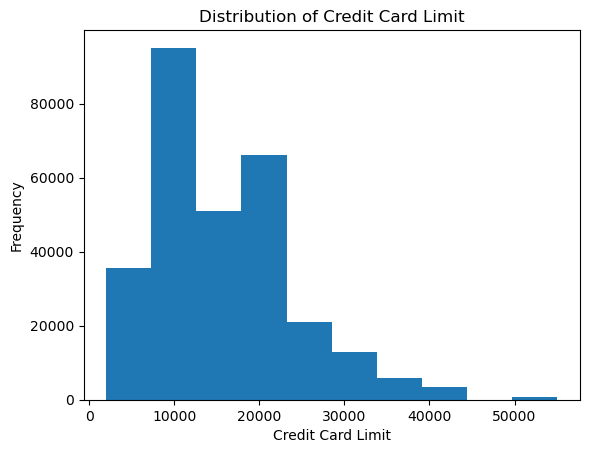

In [15]:
df['credit_card_limit'].plot(kind='hist', bins=10)
plt.xlabel('Credit Card Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Card Limit')
plt.show()

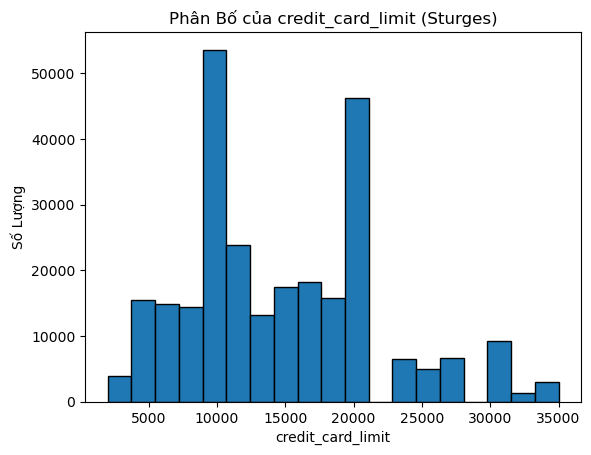

Số lượng khoảng (bins) theo quy tắc Sturges: 19


In [49]:
# Số lượng mẫu
N = len(df)

# Áp dụng công thức Sturges
k_sturges = int(1 + np.log2(N))

# Vẽ biểu đồ phân bố của credit_card_limit
plt.hist(df['credit_card_limit'], bins=k_sturges, edgecolor='black')
plt.title('Phân Bố của credit_card_limit (Sturges)')
plt.xlabel('credit_card_limit')
plt.ylabel('Số Lượng')
plt.show()

print(f"Số lượng khoảng (bins) theo quy tắc Sturges: {k_sturges}")

In [16]:
# Số lượng khoảng
k_sturges = 19
# Tạo cột mới 'credit_card_limit_bins' chứa thông tin về khoảng
df['credit_card_limit_bins'] = pd.cut(df['credit_card_limit'], bins=k_sturges)
# Hiển thị một số dòng đầu của DataFrame để kiểm tra kết quả
print(df[['credit_card_limit', 'credit_card_limit_bins']].head())

   credit_card_limit credit_card_limit_bins
0               6000   (4789.474, 7578.947]
1               6000   (4789.474, 7578.947]
2               6000   (4789.474, 7578.947]
3               6000   (4789.474, 7578.947]
4               6000   (4789.474, 7578.947]


* Mã hóa cột 'credit_card_limit_bins' thành giá trị số và tạo một cột mới 'credit_card_limit_bins_encoded'

In [51]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the 'credit_card_limit_bins' column
df['credit_card_limit_bins_encoded'] = encoder.fit_transform(df['credit_card_limit_bins'])


In [52]:
credit_card_limit_bins_encoded_values = df['credit_card_limit_bins_encoded'].unique()
credit_card_limit_bins_values = df['credit_card_limit_bins'].unique()

credit_card_limit_bins_mapping = dict(zip(credit_card_limit_bins_encoded_values, credit_card_limit_bins_values))
sorted_credit_card_limit_bins_mapping = sorted(credit_card_limit_bins_mapping.items(), key=lambda x: x[0])

print(sorted_credit_card_limit_bins_mapping)


[(0, Interval(1967.0, 3736.842, closed='right')), (1, Interval(3736.842, 5473.684, closed='right')), (2, Interval(5473.684, 7210.526, closed='right')), (3, Interval(7210.526, 8947.368, closed='right')), (4, Interval(8947.368, 10684.211, closed='right')), (5, Interval(10684.211, 12421.053, closed='right')), (6, Interval(12421.053, 14157.895, closed='right')), (7, Interval(14157.895, 15894.737, closed='right')), (8, Interval(15894.737, 17631.579, closed='right')), (9, Interval(17631.579, 19368.421, closed='right')), (10, Interval(19368.421, 21105.263, closed='right')), (11, Interval(22842.105, 24578.947, closed='right')), (12, Interval(24578.947, 26315.789, closed='right')), (13, Interval(26315.789, 28052.632, closed='right')), (14, Interval(29789.474, 31526.316, closed='right')), (15, Interval(31526.316, 33263.158, closed='right')), (16, Interval(33263.158, 35000.0, closed='right'))]


Chuyển đổi biến `trasaction_dollar_amount` thành biến phân loại

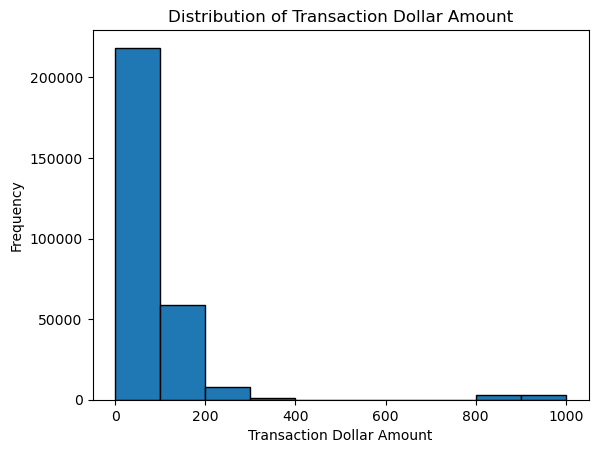

In [17]:
# Plot histogram
plt.hist(df['transaction_dollar_amount'], bins=10, edgecolor='black')
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Dollar Amount')
plt.show()


Do dữ liệu giá trị Transaction Dollar Amount không bố không đều nên thực hiện chia khoảng theo phân vị (percentiles)

In [18]:
percentiles = [0, 25, 50, 75, 100]
value_percentiles = df['transaction_dollar_amount'].quantile([p / 100 for p in percentiles])

# Tạo cột mới với khoảng giá trị dựa trên phân vị
df['transaction_dollar_amount_Range'] = pd.cut(df['transaction_dollar_amount'],\
                                               bins=value_percentiles, labels=[f'{value_percentiles.iloc[i]:.2f}-{value_percentiles.iloc[i+1]:.2f}'\
                                                                                for i in range(len(value_percentiles)-1)])

In [19]:
print(df['transaction_dollar_amount_Range'].value_counts())

29.85-58.29      72917
100.23-999.97    72912
58.29-100.23     72902
0.01-29.85       72887
Name: transaction_dollar_amount_Range, dtype: int64


In [20]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the 'transaction_dollar_amount_Range' column
df['transaction_dollar_amount_Range_encoded'] = encoder.fit_transform(df['transaction_dollar_amount_Range'])


In [21]:
transaction_dollar_amount_Range_mapping = dict(zip(df['transaction_dollar_amount_Range'], df['transaction_dollar_amount_Range_encoded']))
transaction_dollar_amount_Range_mapping

{'0.01-29.85': 0,
 '58.29-100.23': 3,
 '29.85-58.29': 2,
 '100.23-999.97': 1,
 nan: 4}

Có giá trị nan xuất hiện. Thực hiện xóa giá trị 4 ở thuộc tính `transaction_dollar_amount_Range_encoded`

In [22]:
df = df[df['transaction_dollar_amount_Range_encoded'] != 4]

In [34]:
transaction_dollar_amount_Range_mapping = dict(zip(df['transaction_dollar_amount_Range'], df['transaction_dollar_amount_Range_encoded']))
transaction_dollar_amount_Range_mapping

{'0.01-29.85': 0, '58.29-100.23': 3, '29.85-58.29': 2, '100.23-999.97': 1}

In [35]:
transaction_dollar_amount_Range_mapping = dict(zip(df['transaction_dollar_amount_Range'], df['transaction_dollar_amount_Range_encoded']))
transaction_dollar_amount_Range_mapping

{'0.01-29.85': 0, '58.29-100.23': 3, '29.85-58.29': 2, '100.23-999.97': 1}

* Mã hóa cột 'city' thành giá trị số và tạo một cột mới 'city_encoded'

In [23]:
encoder = LabelEncoder()

# Encode the 'city' column
df['city_encoded'] = encoder.fit_transform(df['city'])


Số lần giao dịch trong ngày

In [24]:
df['transactions_per_day'] = df.groupby(['credit_card', 'date_only'])['credit_card'].transform('count')


In [38]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

                 date  transaction_dollar_amount       Long        Lat  \
0 2015-08-05 00:59:19                      11.94 -75.964527  41.353578   
1 2015-10-29 18:23:04                       5.76 -76.019703  41.311467   
2 2015-10-25 17:50:48                      25.84 -76.043031  41.291053   
3 2015-09-05 17:39:43                      68.89 -75.944299  41.327282   
4 2015-09-04 14:12:59                      27.01 -75.997259  41.352099   

    date_only  ... total_transactions_per_card average_transactions_per_card  \
0  2015/08/05  ...                    16767.89                     53.062943   
1  2015/10/29  ...                    16767.89                     53.062943   
2  2015/10/25  ...                    16767.89                     53.062943   
3  2015/09/05  ...                    16767.89                     53.062943   
4  2015/09/04  ...                    16767.89                     53.062943   

  cumulative_transaction_count cumulative_transaction_sum  \
0                            1                      11.94   
1                            2                      17.70   
2                            3                      43.54   
3                            4                     112.43   
4                            5                     139.44   

  credit_card_limit_range state_encoded  transaction_dollar_amount_Range  \
0         1967.00-8600.00            27                       0.01-29.85   
1         1967.00-8600.00            27                       0.01-29.85   
2         1967.00-8600.00            27                       0.01-29.85   
3         1967.00-8600.00            27                     58.29-100.23   
4         1967.00-8600.00            27                       0.01-29.85   

   transaction_dollar_amount_Range_encoded  city_encoded  transactions_per_day  
0                                        0            29                     5  
1                                        0            29                     1  
2                                        0            29                     5  
3                                        3            29                     8  
4                                        0            29                     5  

[5 rows x 26 columns]

Tính khoảng cách Long và Lat bằng hàm Euclidean

In [25]:
#Euclidean giữ Long, Lat
df['distance'] = np.sqrt((df['Long'] - df['Lat'])**2 + (df['Lat'] - df['Long'])**2)
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

                 date  transaction_dollar_amount       Long        Lat  \
0 2015-08-05 00:59:19                      11.94 -75.964527  41.353578   
1 2015-10-29 18:23:04                       5.76 -76.019703  41.311467   
2 2015-10-25 17:50:48                      25.84 -76.043031  41.291053   
3 2015-09-05 17:39:43                      68.89 -75.944299  41.327282   
4 2015-09-04 14:12:59                      27.01 -75.997259  41.352099   

    date_only  ... average_transactions_per_card cumulative_transaction_count  \
0  2015/08/05  ...                     53.062943                            1   
1  2015/10/29  ...                     53.062943                            2   
2  2015/10/25  ...                     53.062943                            3   
3  2015/09/05  ...                     53.062943                            4   
4  2015/09/04  ...                     53.062943                            5   

  cumulative_transaction_sum state_encoded credit_card_limit_bins  \
0                      11.94            27   (4789.474, 7578.947]   
1                      17.70            27   (4789.474, 7578.947]   
2                      43.54            27   (4789.474, 7578.947]   
3                     112.43            27   (4789.474, 7578.947]   
4                     139.44            27   (4789.474, 7578.947]   

  transaction_dollar_amount_Range  transaction_dollar_amount_Range_encoded  \
0                      0.01-29.85                                        0   
1                      0.01-29.85                                        0   
2                      0.01-29.85                                        0   
3                    58.29-100.23                                        3   
4                      0.01-29.85                                        0   

   city_encoded  transactions_per_day    distance  
0            29                     5  165.912855  
1            29                     1  165.931332  
2            29                     5  165.935453  
3            29                     8  165.847061  
4            29                     5  165.957054  

[5 rows x 27 columns]

Lấy số nguyên của cột `Long`

In [109]:
# Hàm để cắt giá trị
def cut_long_lat(value):
    # Convert the float object to a string
    num_str = str(value)

    # Split the string using the "." delimiter
    parts = num_str.split(".")

    # Get the first two values before the "."
    result = int(parts[0])
    
    return result 

df['Long_degree'] = df['Long'].apply(cut_long_lat)
df['Lat_degree'] = df['Lat'].apply(cut_long_lat)

<a id="3.3"></a>
#### ️🎯 3.3 Xóa biến không cần thiết

In [27]:
#sau khi bóc tách dữ liệu thuộc tính 'date', tiến hành xóa nó ra khỏi bộ dữ liệu
df = df.drop(columns= ["date"], axis = 1)

In [68]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

   transaction_dollar_amount       Long        Lat   date_only time_only  ...  \
0                      11.94 -75.964527  41.353578  2015/08/05  00:59:19  ...   
1                       5.76 -76.019703  41.311467  2015/10/29  18:23:04  ...   
2                      25.84 -76.043031  41.291053  2015/10/25  17:50:48  ...   
3                      68.89 -75.944299  41.327282  2015/09/05  17:39:43  ...   
4                      27.01 -75.997259  41.352099  2015/09/04  14:12:59  ...   

  year_only state_encoded credit_card_limit_bins  \
0      2015            27   (5473.684, 7210.526]   
1      2015            27   (5473.684, 7210.526]   
2      2015            27   (5473.684, 7210.526]   
3      2015            27   (5473.684, 7210.526]   
4      2015            27   (5473.684, 7210.526]   

  credit_card_limit_bins_encoded transaction_dollar_amount_Range  \
0                              2                      0.01-27.93   
1                              2                      0.01-27.93   
2                              2                      0.01-27.93   
3                              2                     53.59-88.76   
4                              2                      0.01-27.93   

   transaction_dollar_amount_Range_encoded city_encoded  transactions_per_day  \
0                                        0           29                     5   
1                                        0           29                     1   
2                                        0           29                     5   
3                                        2           29                     8   
4                                        0           29                     5   

     distance  Long_degree  
0  165.912855          -75  
1  165.931332          -76  
2  165.935453          -76  
3  165.847061          -75  
4  165.957054          -75  

[5 rows x 24 columns]

In [28]:
# df.to_csv('credit_card_merged_cleaned.csv', index = False)

<a id="3.4"></a>
#### ️🎯 3.4 Lưu tập dữ liệu

In [69]:
# df.to_csv('credit_card_data_1.csv', index = False)

<a id="4"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 4. Phân tích mối quan hệ</strong></h1>
<hr>

<a id="4.1"></a>
#### ️🎯 4.1 Xét tổng quan mối quan hệ

C:\Users\datho\AppData\Local\Temp\ipykernel_14960\590667038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop("credit_card", axis=1).corr()


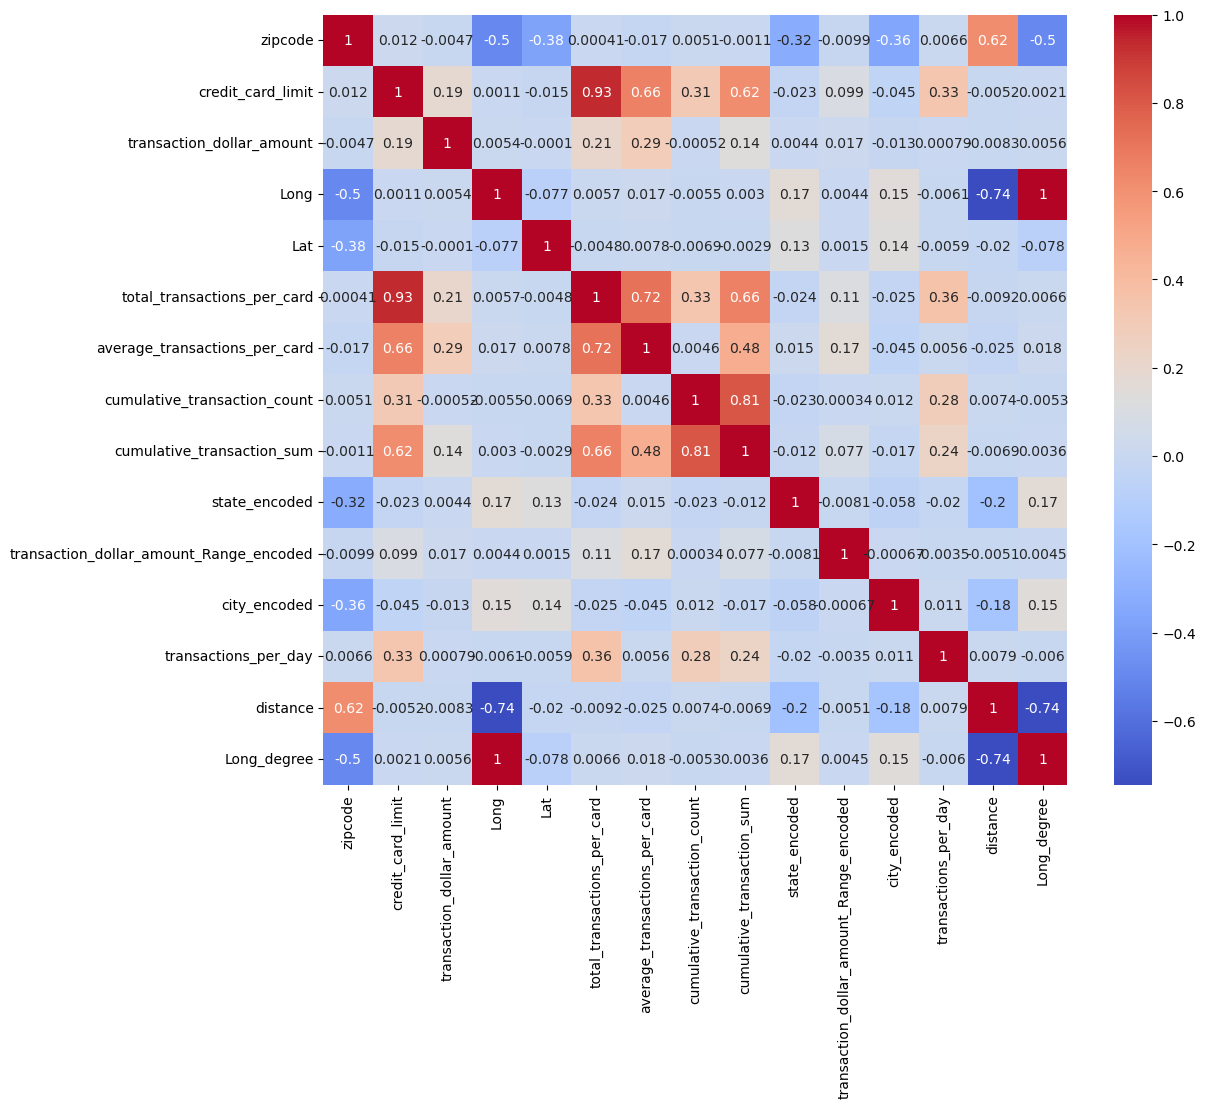

In [30]:
# Exclude the "credit_card" variable from the correlation matrix
correlation_matrix = df.drop("credit_card", axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

**Thực hiện vẽ biểu đồ cho thấy được sự phân tán giữa các biến**

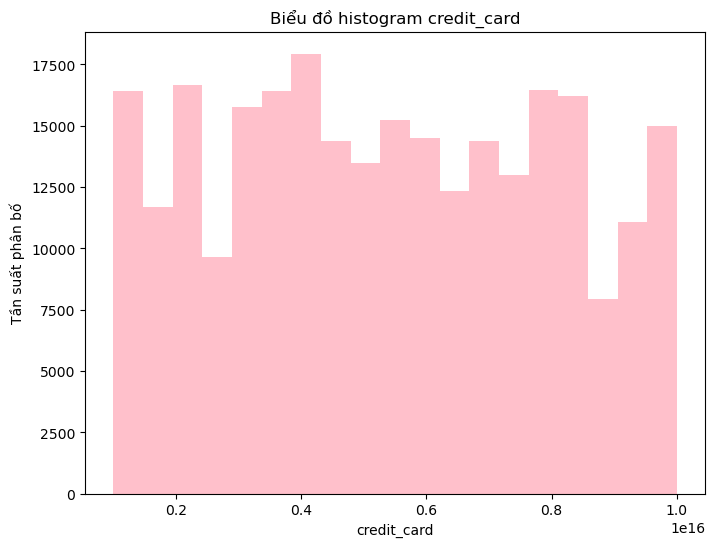

In [71]:
# Vẽ biểu đồ histogram cho credit_card
plt.figure(figsize=(8, 6))
plt.hist(df['credit_card'], bins=19, color ='pink')
plt.xlabel('credit_card')
plt.ylabel('Tần suất phân bố')
plt.title('Biểu đồ histogram credit_card')
plt.show()

<Axes: >

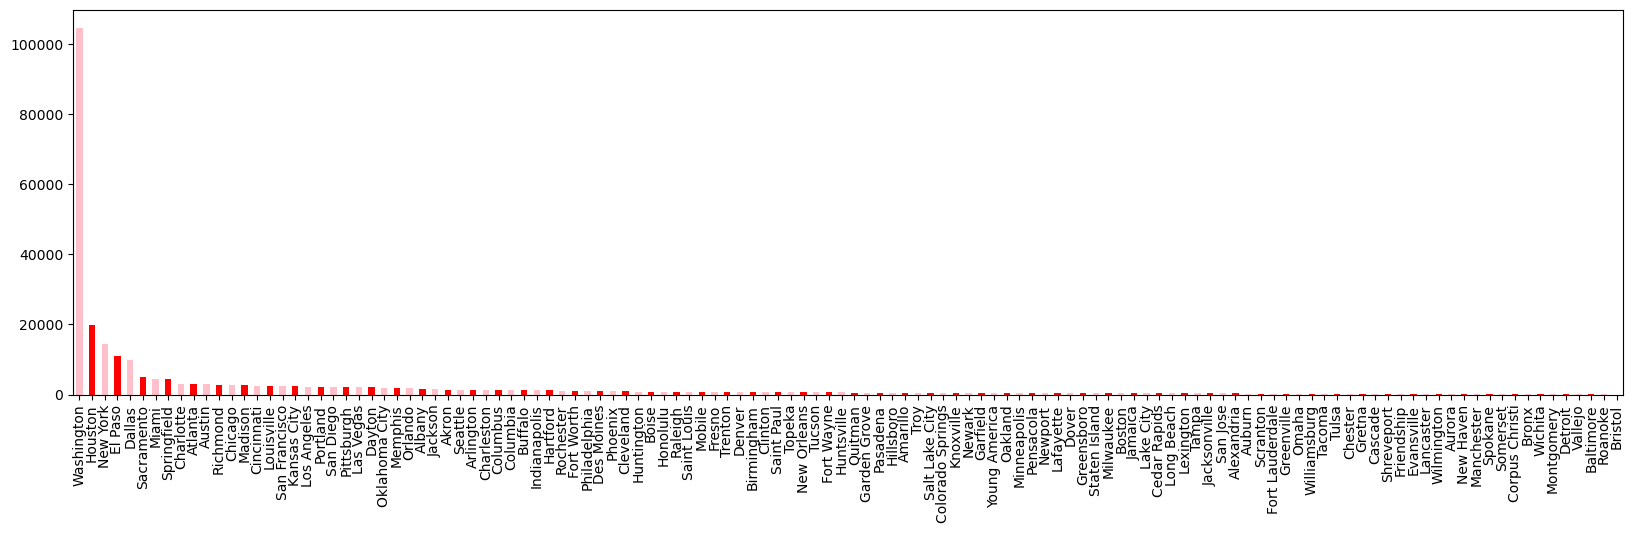

In [72]:
#số lượng giao dịch dựa trên city
df['city'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

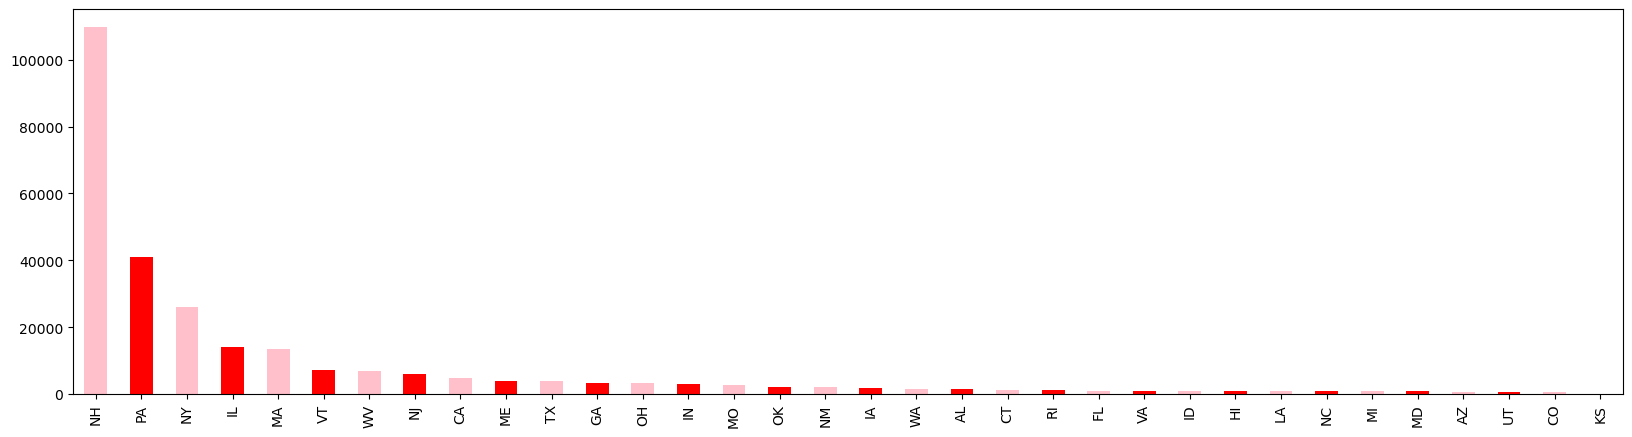

In [73]:
#số lượng giao dịch dựa trên state
df['state'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])


**Ở 2 biểu đồ trên, ta có thể thấy, lượng giao dịch tập trung khá nhiều ở thành phố "Washington" và đặc biệt là ở tiểu bang "NH". Ở Thành Phố "Washington" và Tiểu Bang "NH" có giá trị và số lượng giao dịch rất cao so với các Thành Phố và Tiểu Bang khác.**

<Axes: >

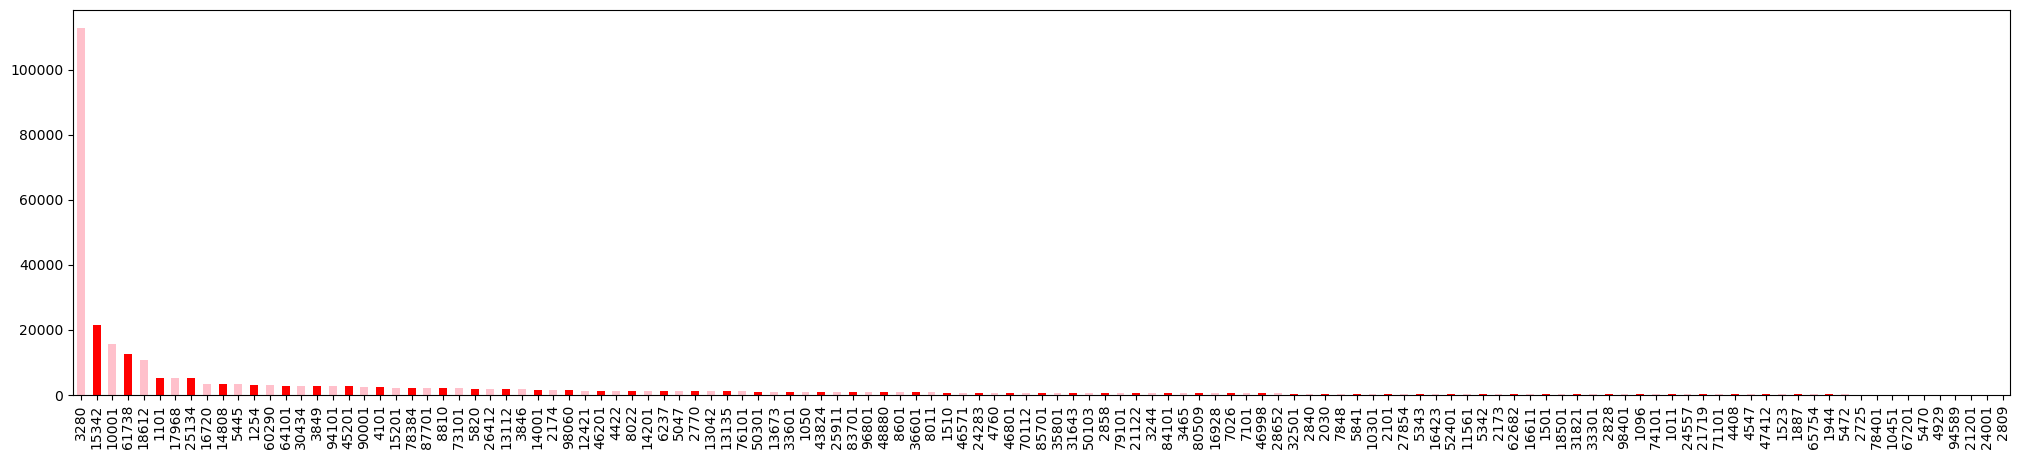

In [86]:
#số lượng giao dịch dựa trên zipcode
df['zipcode'].value_counts().plot(kind='bar', figsize= (25,5),color=['pink', 'red'])


<Axes: >

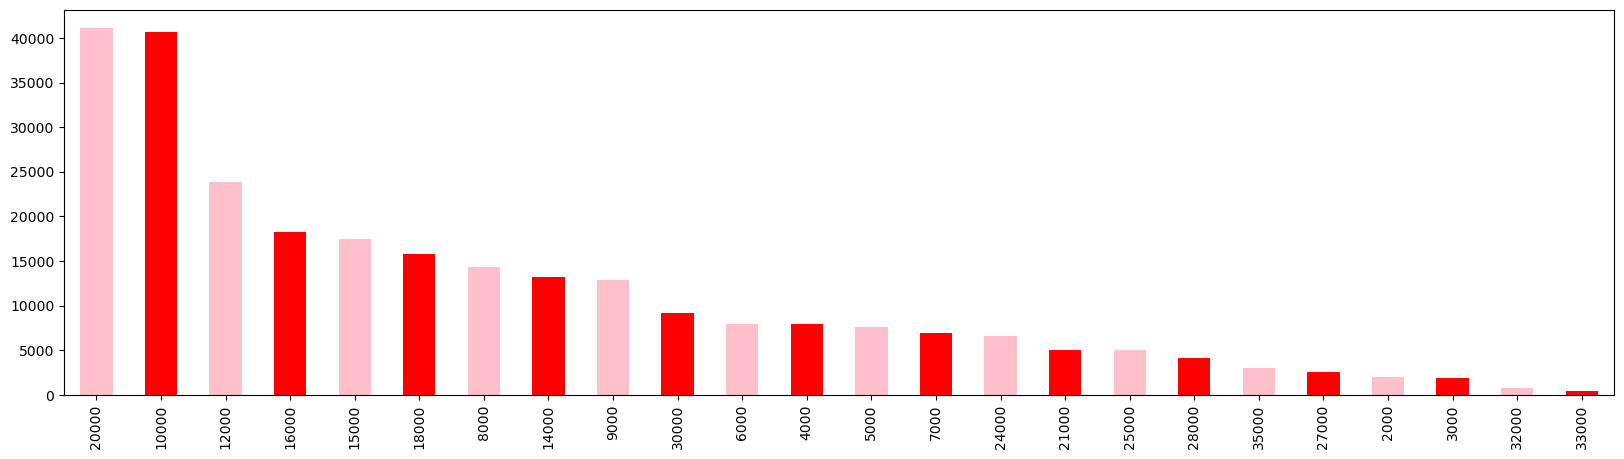

In [76]:
#số lượng giao dịch dựa trên zipcode
df['credit_card_limit'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

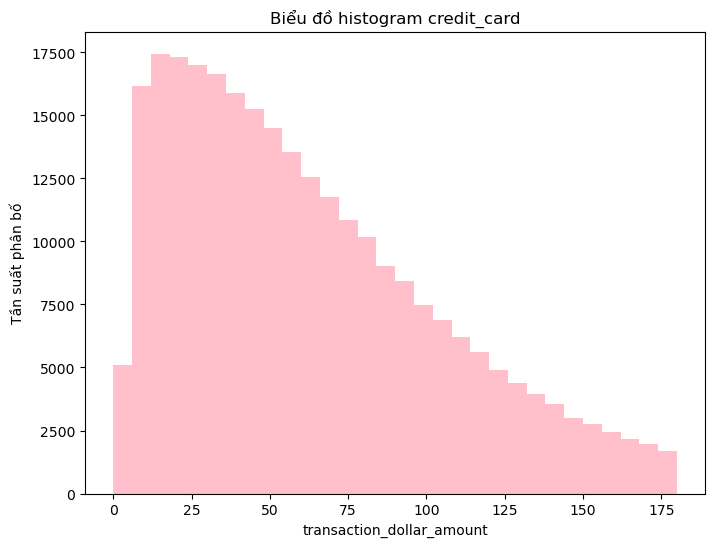

In [75]:
#số lượng giao dịch dựa trên transaction_dollar_amount
plt.figure(figsize=(8, 6))
plt.hist(df['transaction_dollar_amount'], bins=30, color ='pink')
plt.xlabel('transaction_dollar_amount')
plt.ylabel('Tần suất phân bố')
plt.title('Biểu đồ histogram credit_card')
plt.show()

<a id="4.2"></a>
#### ️🎯 4.2 Mối quan hệ giữa thành phố và mức giới hạn thẻ tín dụng

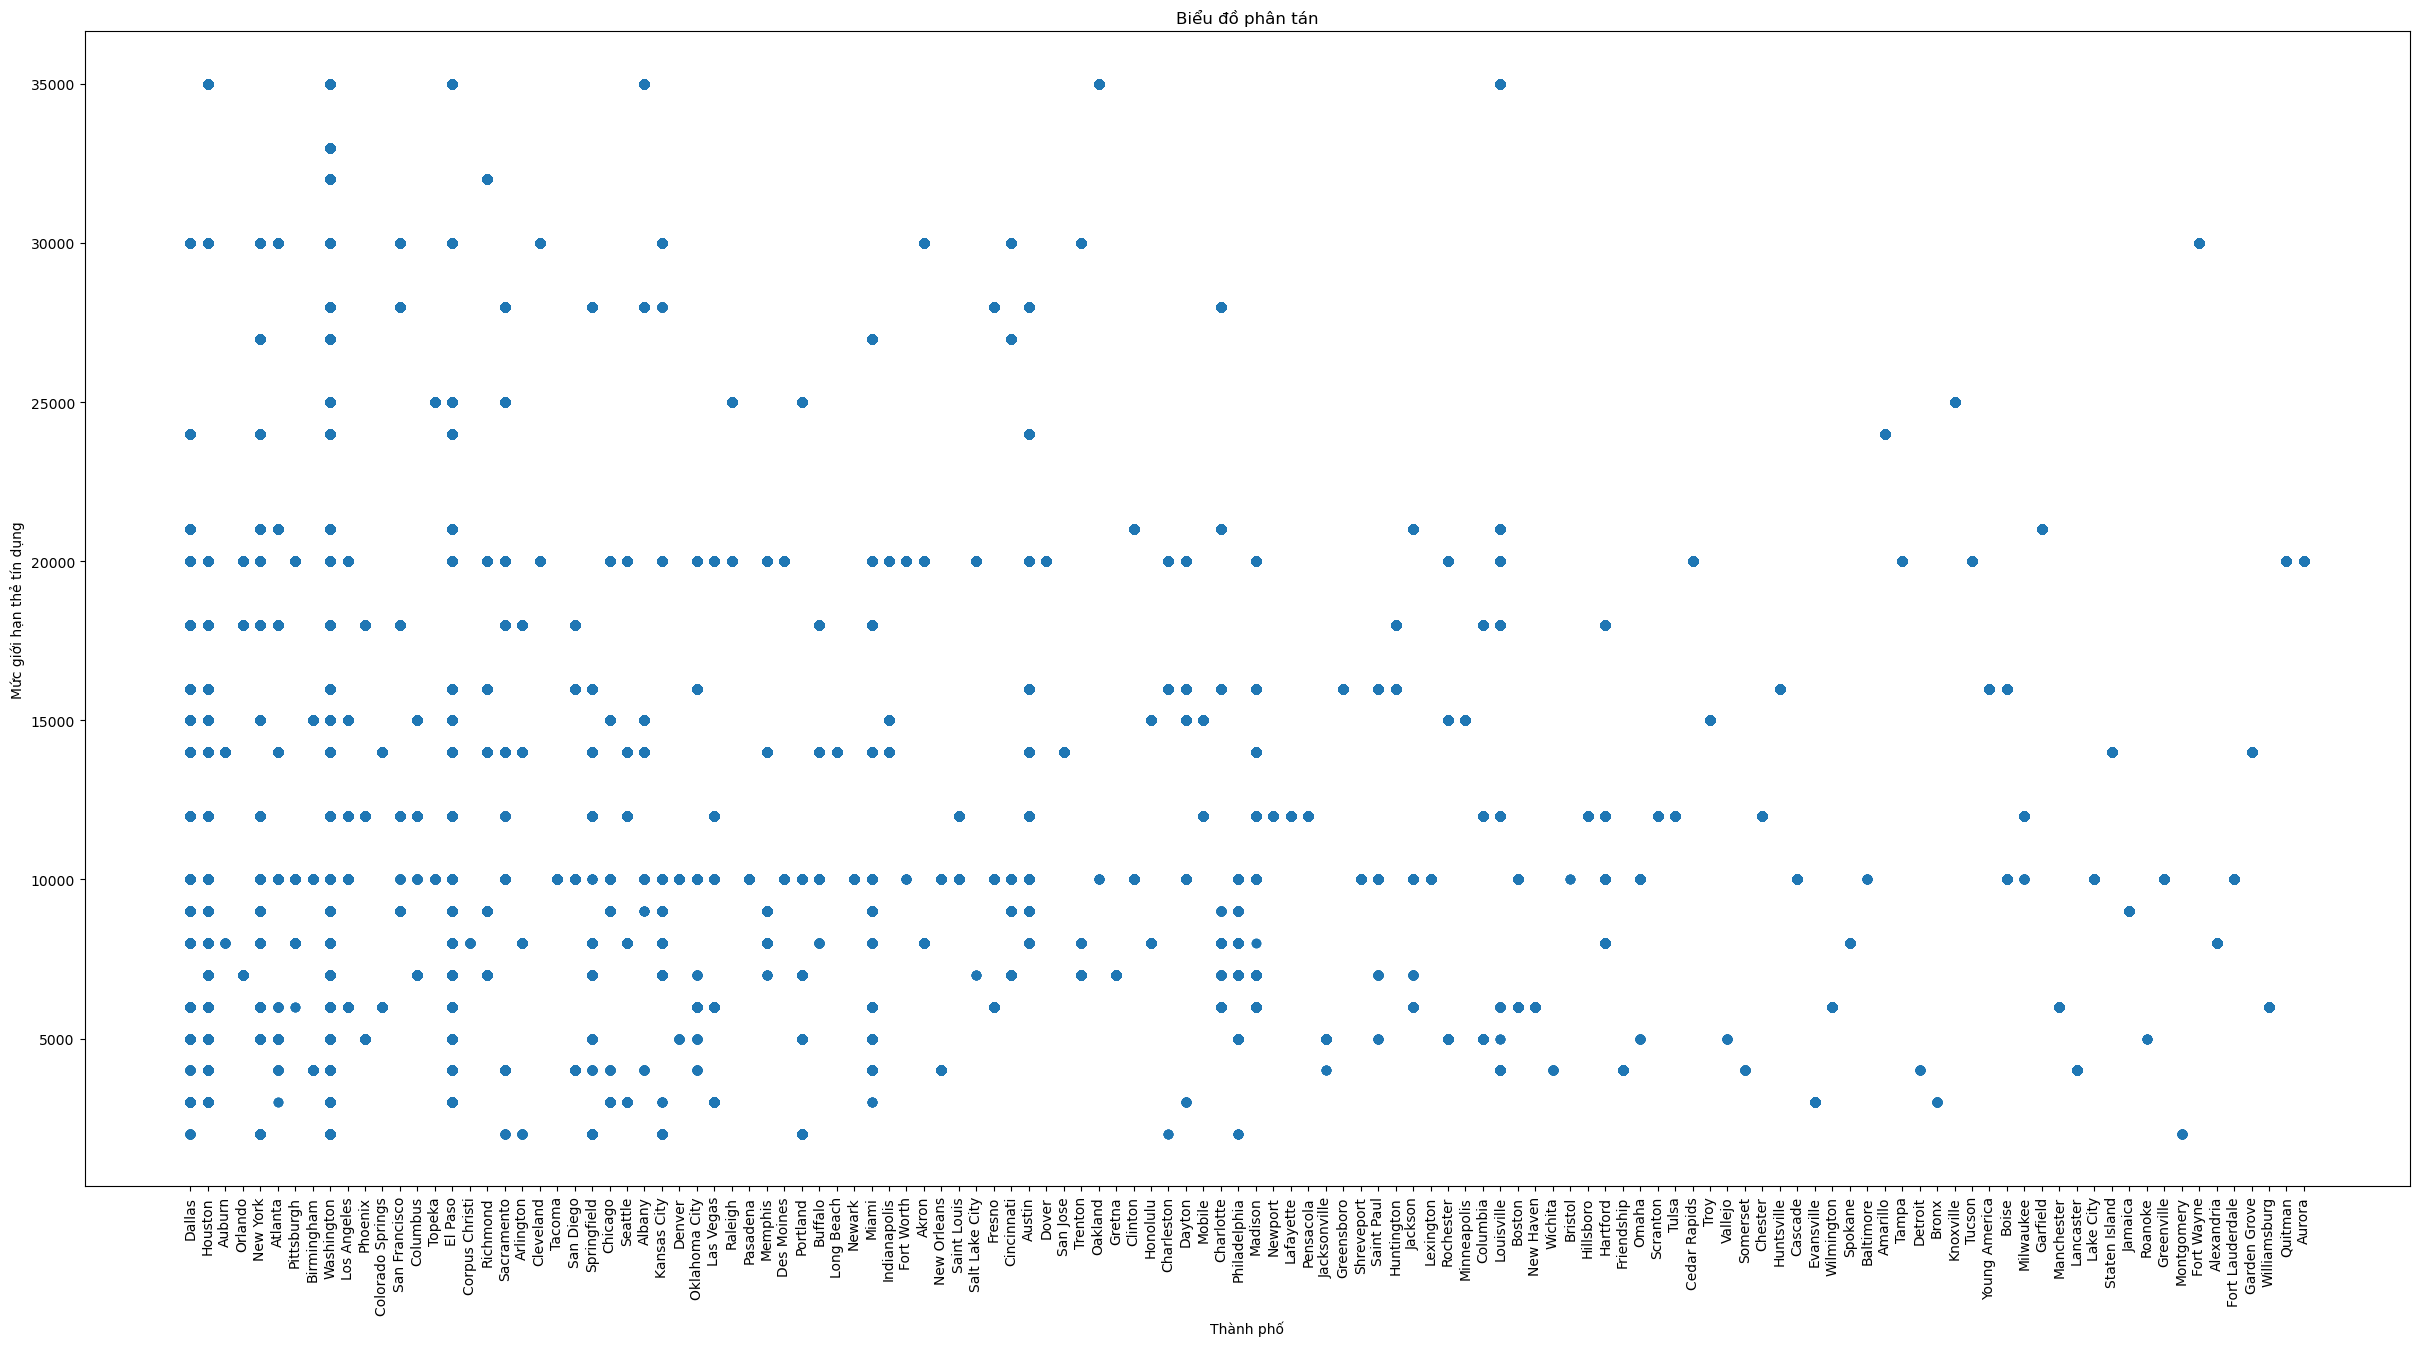

In [74]:
# Vẽ biểu đồ phân tán giữa "city" và "credit_card_limit"
plt.figure(figsize=(30, 15))
plt.scatter(df['city'], df['credit_card_limit'])
plt.xlabel('Thành phố')
plt.ylabel('Mức giới hạn thẻ tín dụng')
plt.xticks(rotation=90)  # Xoay tên trục x 90 độ
plt.title('Biểu đồ phân tán')
plt.show()


Theo kết luận ở trên, thành phố washington là nơi có số lượng người giao dịch thẻ tín dụng nhiều nhất nhưng dựa trên biểu đồ về giới hạn của thẻ tín dụng thì thành phố này lại thuộc nhóm được cấp hạn mức thấp nhất. Vậy thì có những lí do gì ?
 - Điều kiện kinh tế của thành phố
 - Tỉ lệ tội phạm và các hành vi gian lận cao
 - Tình hình kinh tế.

<a id="4.3"></a>
#### ️🎯 4.3 Mối quan hệ giữa credit_card_limit và transaction_amount

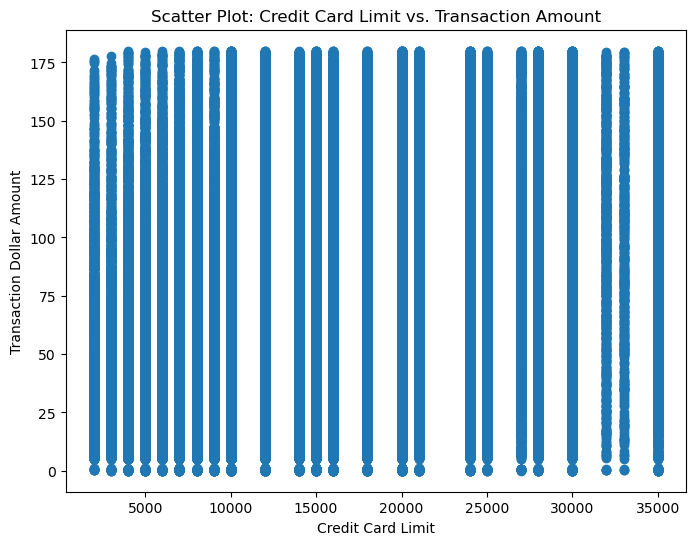

Correlation between Credit Card Limit and Transaction Amount: 0.352714001693569


In [77]:
# Biểu đồ phân tán
plt.figure(figsize=(8, 6))
plt.scatter(df['credit_card_limit'], df['transaction_dollar_amount'])
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.title('Scatter Plot: Credit Card Limit vs. Transaction Amount')
plt.show()

# Tính hệ số tương quan
correlation = df['credit_card_limit'].corr(df['transaction_dollar_amount'])
print(f'Correlation between Credit Card Limit and Transaction Amount: {correlation}')


 **Dựa vào biểu đồ trên, ta thấy: Nếu thẻ tín dụng có hạn mức cao hơn thì tương đương với số tiền sử dụng cũng nhiều hơn**

<a id="4.4"></a>
#### ️🎯 4.4 Mối quan hệ giữa số lượng thẻ tín dụng được sử dụng và số lượng giao dịch

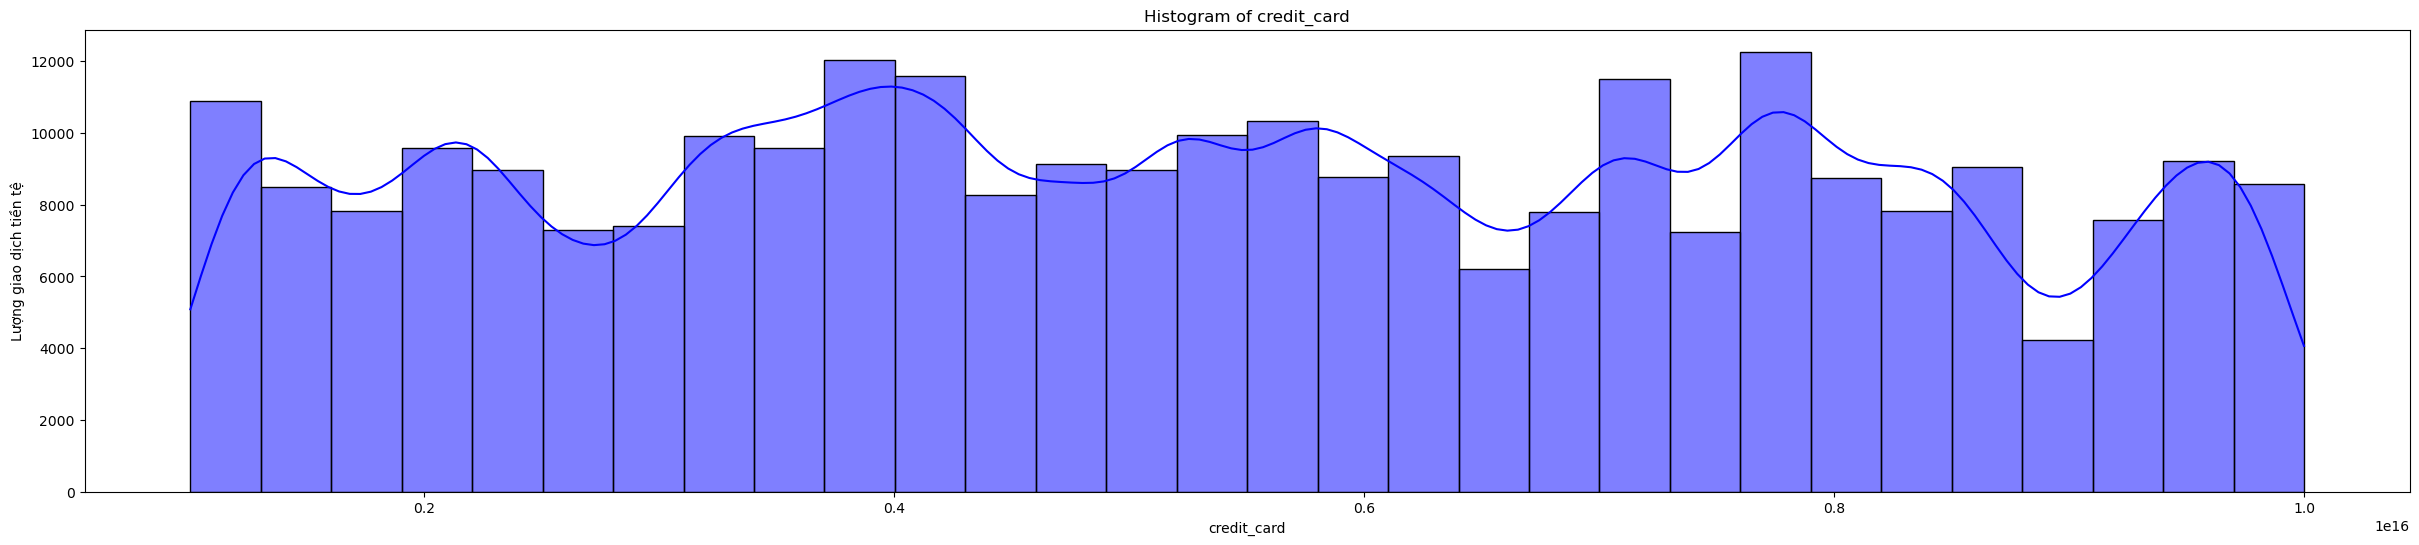

In [78]:
plt.figure(figsize=(30, 6))
sns.histplot(df, x='credit_card', kde=True, bins=30, color='blue')
plt.title('Histogram of credit_card')
plt.xlabel('credit_card')
plt.ylabel('Lượng giao dịch tiền tệ')
plt.show()

<a id="4.5"></a>
#### ️🎯 4.5 Mối quan hệ giữa số tiền giao dịch và số lần giao dịch trong ngày. Nếu vượt quá ngưỡng thì có là giao dịch gian lận không?

<Axes: xlabel='transactions_per_day', ylabel='transaction_dollar_amount'>

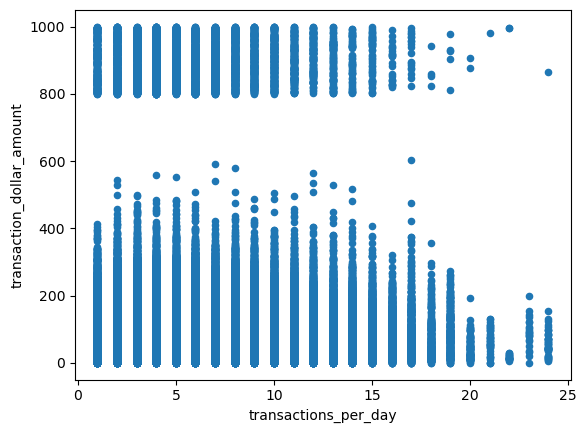

In [31]:
df.plot(x='transactions_per_day', y='transaction_dollar_amount', kind='scatter')

=> Số lượng cân bằng tại số lượng 1->15. Từ 15 trở đi giá trị giao dịch rời rạc hơn.

<a id="4.6"></a>
#### ️🎯 4.6 Mối quan hệ giữa số tiền giao dịch (transactions_dollar amount) và các Bang (state)

**Những bang có tổng số tiền giao dịch cao và thấp có ảnh hưởng đến giá trị giao dịch và việc phát hiện gian lận hay không?**
> Cần chia cụm thành 2 cụm (Cao- Thấp) hoặc k cụm

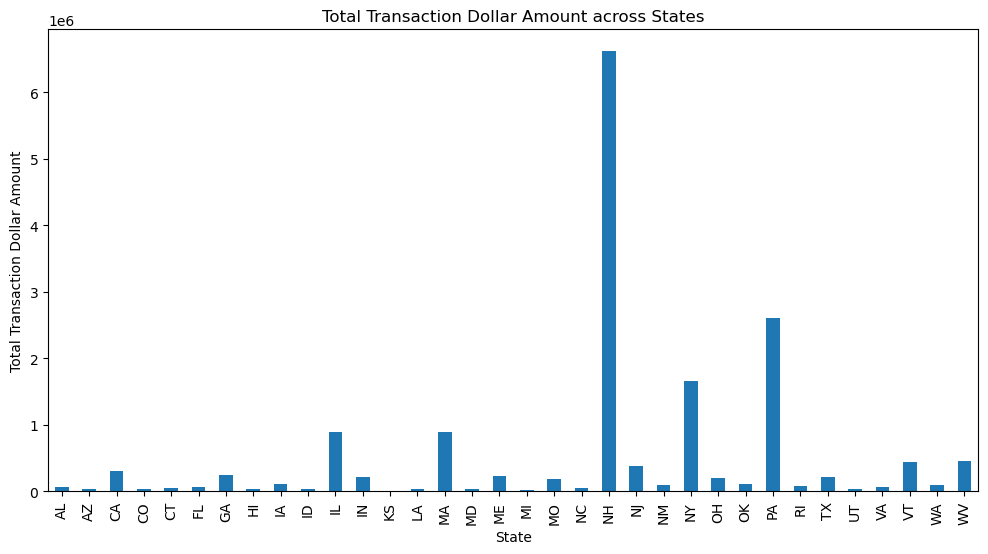

In [80]:
# Group the data by state and calculate the total transaction_dollar_amount
state_total = df.groupby('state')['transaction_dollar_amount'].sum()
# Plot the bar chart
plt.figure(figsize=(12, 6))
state_total.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Transaction Dollar Amount')
plt.title('Total Transaction Dollar Amount across States')
plt.show()


In [81]:
# Tính tổng lượng tiền giao dịch của mỗi 'state'
total_transaction_by_state = df.groupby('state')['transaction_dollar_amount'].sum().reset_index()

# Thực hiện gom cụm
X = total_transaction_by_state[['transaction_dollar_amount']]
kmeans = KMeans(n_clusters=2, random_state=42)
total_transaction_by_state['cluster'] = kmeans.fit_predict(X)

# Biểu đồ scatter plot
fig = px.scatter(total_transaction_by_state,
                 x='state',
                 y='transaction_dollar_amount',
                 color='cluster',
                 title='Clusters of States based on Transaction Amount',
                 labels={'transaction_dollar_amount': 'Total Transaction Amount'},
                 hover_data=['transaction_dollar_amount'])

# Hiển thị biểu đồ
fig.show()

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Quan sát:
1. nếu chia 2 cụm thì state NH có tổng số tiền giao dịch có khoảng cách quá xa so với các state còn lại
2. Số lượng state tập trung về cluster 0

Thực hiện tìm k để có số cụm tốt

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

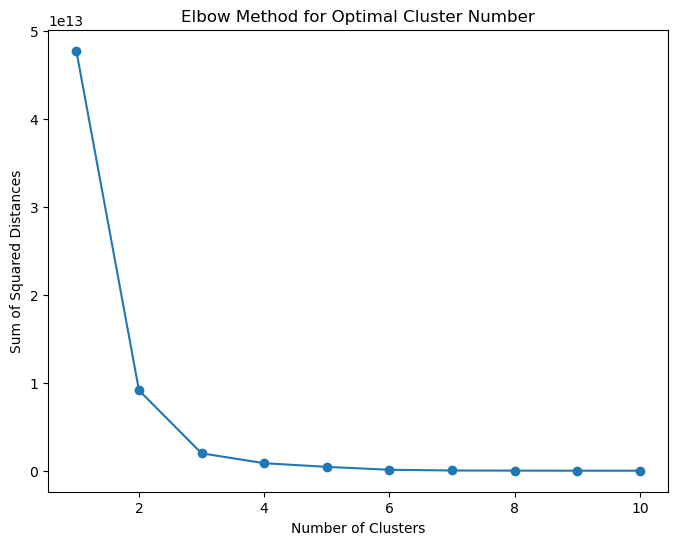

In [82]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(total_transaction_by_state[['transaction_dollar_amount']])
    sse.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

Quan sát từ k=4 trở đi, đường cong không còn giảm nữa \
--> Nên chọn k=4 làm số lượng cụm tối ưu

In [83]:

X = total_transaction_by_state[['transaction_dollar_amount']]
kmeans = KMeans(n_clusters=4, random_state=42)
total_transaction_by_state['transaction_cluster'] = kmeans.fit_predict(X)

# Biểu đồ scatter plot
fig = px.scatter(total_transaction_by_state,
                 x='state',
                 y='transaction_dollar_amount',
                 color='transaction_cluster',
                 title='Clusters of States based on Transaction Amount',
                 labels={'transaction_dollar_amount': 'Total Transaction Amount'},
                 hover_data=['transaction_dollar_amount'])

# Hiển thị biểu đồ
fig.show()

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\datho\anaconda3\envs\study\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [84]:
# Lọc và in ra các tiểu bang thuộc từng cụm
for cluster_num in range(4):
    states_in_cluster = total_transaction_by_state[total_transaction_by_state['transaction_cluster'] == cluster_num]['state'].tolist()
    print(f'Cluster {cluster_num}: {states_in_cluster}')

Cluster 0: ['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID', 'IN', 'KS', 'LA', 'MD', 'ME', 'MI', 'MO', 'NC', 'NJ', 'NM', 'OH', 'OK', 'RI', 'TX', 'UT', 'VA', 'VT', 'WA', 'WV']
Cluster 1: ['NH']
Cluster 2: ['PA']
Cluster 3: ['IL', 'MA', 'NY']


In [85]:
# Thêm cột 'cluster' vào DataFrame gốc
df = pd.merge(df, total_transaction_by_state[['state', 'transaction_cluster']], on='state', how='left')
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

   transaction_dollar_amount       Long        Lat   date_only time_only  ...  \
0                      11.94 -75.964527  41.353578  2015/08/05  00:59:19  ...   
1                       5.76 -76.019703  41.311467  2015/10/29  18:23:04  ...   
2                      25.84 -76.043031  41.291053  2015/10/25  17:50:48  ...   
3                      68.89 -75.944299  41.327282  2015/09/05  17:39:43  ...   
4                      27.01 -75.997259  41.352099  2015/09/04  14:12:59  ...   

  state_encoded credit_card_limit_bins credit_card_limit_bins_encoded  \
0            27   (5473.684, 7210.526]                              2   
1            27   (5473.684, 7210.526]                              2   
2            27   (5473.684, 7210.526]                              2   
3            27   (5473.684, 7210.526]                              2   
4            27   (5473.684, 7210.526]                              2   

  transaction_dollar_amount_Range transaction_dollar_amount_Range_encoded  \
0                      0.01-27.93                                       0   
1                      0.01-27.93                                       0   
2                      0.01-27.93                                       0   
3                     53.59-88.76                                       2   
4                      0.01-27.93                                       0   

   city_encoded transactions_per_day    distance Long_degree  \
0            29                    5  165.912855         -75   
1            29                    1  165.931332         -76   
2            29                    5  165.935453         -76   
3            29                    8  165.847061         -75   
4            29                    5  165.957054         -75   

   transaction_cluster  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  

[5 rows x 25 columns]

**Biểu đồ phân phối cụm các tiểu bang**

In [86]:
# Tính tổng lượng tiền giao dịch của mỗi 'state'
total_transaction_by_state = df.groupby(['state', 'transaction_cluster'])['transaction_dollar_amount'].sum().reset_index()

# Biểu đồ choropleth
fig = px.choropleth(total_transaction_by_state,
                    locations='state',
                    locationmode='USA-states', 
                    color='transaction_cluster',  # Màu dựa trên giá trị của cột 'transaction_cluster'
                    color_continuous_scale='Viridis',  # Cấu hình màu sắc
                    scope='usa',
                    title='Transaction Clusters by State',
                    labels={'transaction_cluster': 'Transaction Cluster'},
                    )

# Hiển thị biểu đồ
fig.show()

<a id="4.7"></a>
#### ️🎯 4.7 Mối quan hệ giữa 'Long', 'Lat' với transaction_dollar_amount
Liệu có phát hiện được gian lận thẻ tín dụng dựa trên phát hiện các vị trí giao dịch bất thường, địa điểm không phù hợp và không có giao dịch thường xuyên

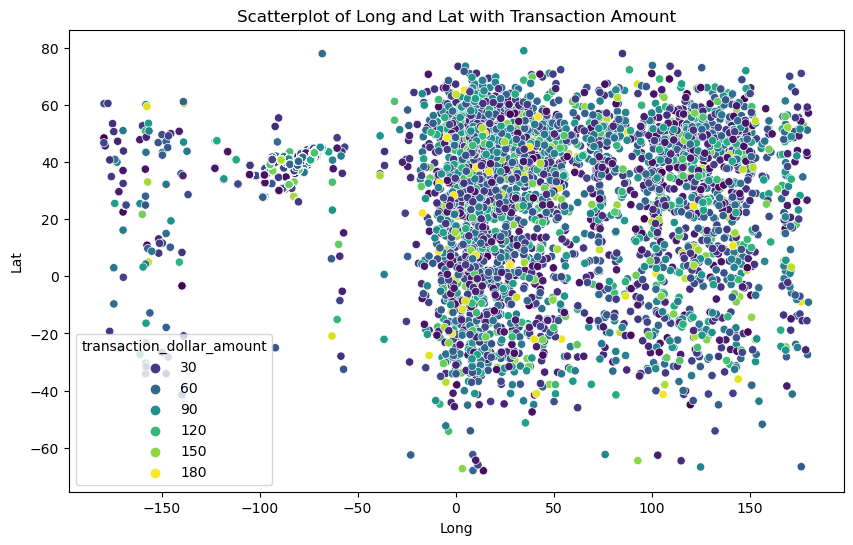

In [87]:
# Biểu đồ scatterplot giữa Long và Lat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', data=df, hue='transaction_dollar_amount', palette='viridis')
plt.title('Scatterplot of Long and Lat with Transaction Amount')
plt.show()

> Những giao dịch có tổng số tiền nhỏ hơn 30 tại một vị trí Long,Lat

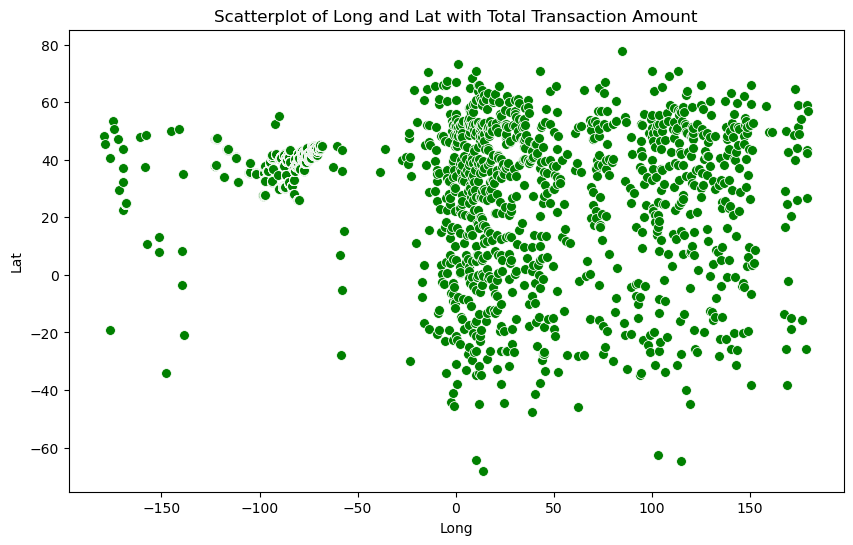

In [90]:

# Tính tổng số tiền giao dịch cho mỗi vị trí
total_transaction_by_location = df.groupby(['Long', 'Lat'])['transaction_dollar_amount'].sum().reset_index()

# Lọc dữ liệu cho các vị trí có tổng số tiền giao dịch là 800
df_filtered = total_transaction_by_location[total_transaction_by_location['transaction_dollar_amount'] <= 30]

# Biểu đồ scatterplot giữa Long và Lat chỉ với tổng số tiền giao dịch là 800
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', data=df_filtered, color='green', s=50)
plt.title('Scatterplot of Long and Lat with Total Transaction Amount')
plt.show()

Nhận xét: Các vị trí có tổng số tiền giao dịch nhỏ hơn 30 sẽ tập trung ở Lat từ 30 đến 70 và Long từ -10 đến 60

> Những vị trí có tổng số tiền giao dịch lớn hơn 30 và nhỏ hơn 60

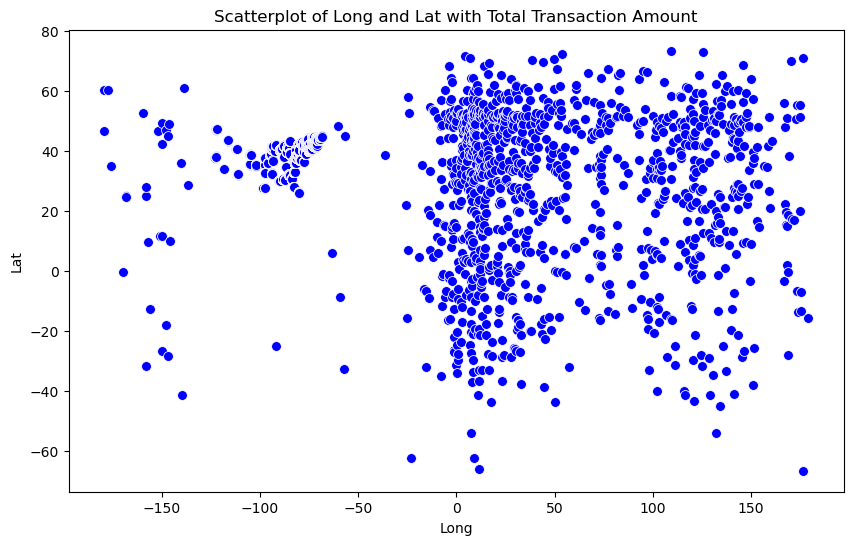

In [91]:

# Tính tổng số tiền giao dịch cho mỗi vị trí
total_transaction_by_location = df.groupby(['Long', 'Lat'])['transaction_dollar_amount'].sum().reset_index()

# Lọc dữ liệu cho các vị trí có tổng số tiền giao dịch
df_filtered = total_transaction_by_location[(total_transaction_by_location['transaction_dollar_amount'] > 30) & (total_transaction_by_location['transaction_dollar_amount'] <= 60)]

# Biểu đồ scatterplot giữa Long và Lat chỉ với tổng số tiền giao dịch là 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', data=df_filtered, color='blue', s=50)
plt.title('Scatterplot of Long and Lat with Total Transaction Amount')
plt.show()

Nhận xét: Các vị trí có tổng số tiền giao dịch lớn hơn 30 và nhỏ hơn 60 sẽ tập trung ở Lat từ 30 đến 50 và Long từ -110 đến -60. Phân bố rải rác Long 0 đến 160

> Những vị trí có tổng số tiền giao dịch lớn hơn 60 và nhỏ hơn 90

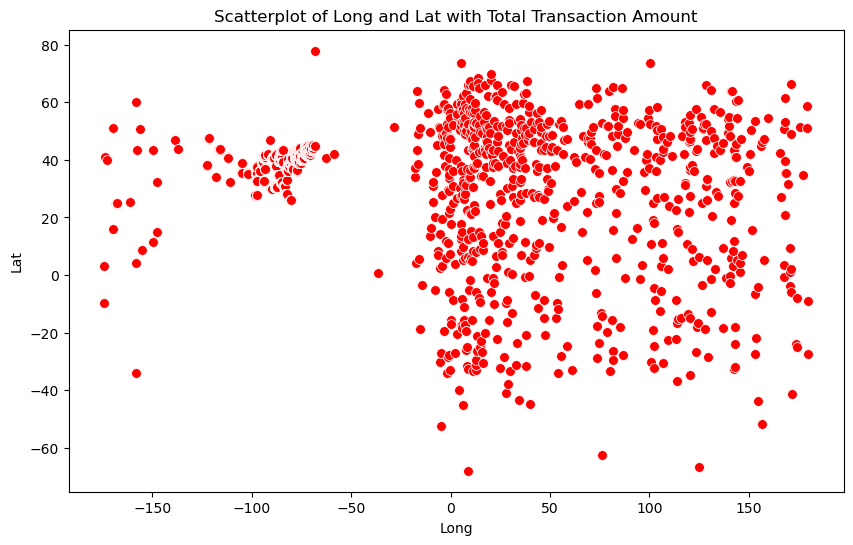

In [92]:
# Tính tổng số tiền giao dịch cho mỗi vị trí
total_transaction_by_location = df.groupby(['Long', 'Lat'])['transaction_dollar_amount'].sum().reset_index()

# Lọc dữ liệu cho các vị trí có tổng số tiền giao dịch là 800
df_filtered = total_transaction_by_location[(total_transaction_by_location['transaction_dollar_amount'] > 60) & (total_transaction_by_location['transaction_dollar_amount'] <= 90)]

# Biểu đồ scatterplot giữa Long và Lat chỉ với tổng số tiền giao dịch
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', data=df_filtered, color='red', s=50)
plt.title('Scatterplot of Long and Lat with Total Transaction Amount')
plt.show()

Nhận xét: Các vị trí có tổng số tiền giao dịch lớn hơn 60 và nhỏ hơn 90 có số lượng không nhiều, tập trung ở Lat từ 40 đến 45 và Long từ -90 đến -60. Và có một giao dịch nằm ở Lat 23 Long 140

> Những vị trí có tổng số tiền giao dịch lớn hơn 90

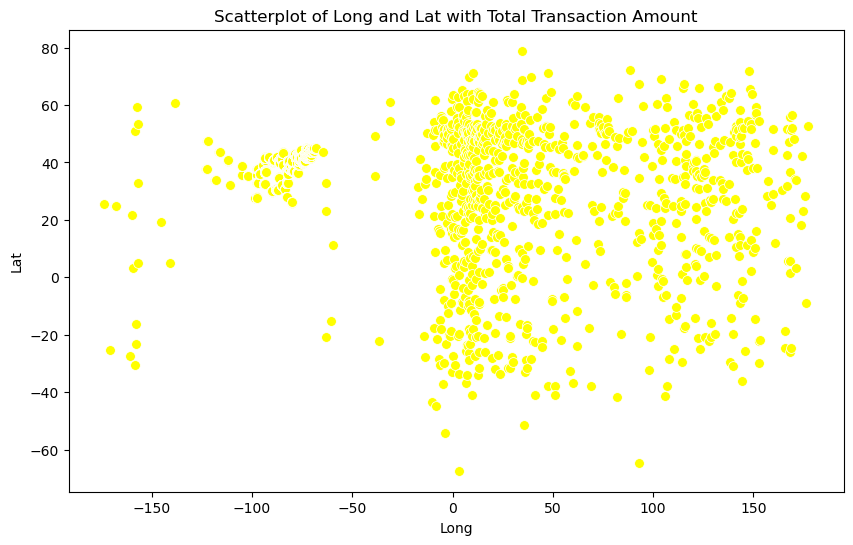

In [93]:
# Tính tổng số tiền giao dịch cho mỗi vị trí
total_transaction_by_location = df.groupby(['Long', 'Lat'])['transaction_dollar_amount'].sum().reset_index()

# Lọc dữ liệu cho các vị trí có tổng số tiền giao dịch là 800
df_filtered = total_transaction_by_location[(total_transaction_by_location['transaction_dollar_amount'] > 90)]

# Biểu đồ scatterplot giữa Long và Lat chỉ với tổng số tiền giao dịch
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', data=df_filtered, color='yellow', s=50)
plt.title('Scatterplot of Long and Lat with Total Transaction Amount')
plt.show()

Nhận xét: Các vị trí có tổng số tiền giao dịch lớn hơn 90, tập trung ở Lat từ 20 đến 50 và Long từ -100 đến -60. Và phân bố rải rác từ Long 0 đến 150

Mối quan hệ giữa credit_card_limit, total_transactions_per_card

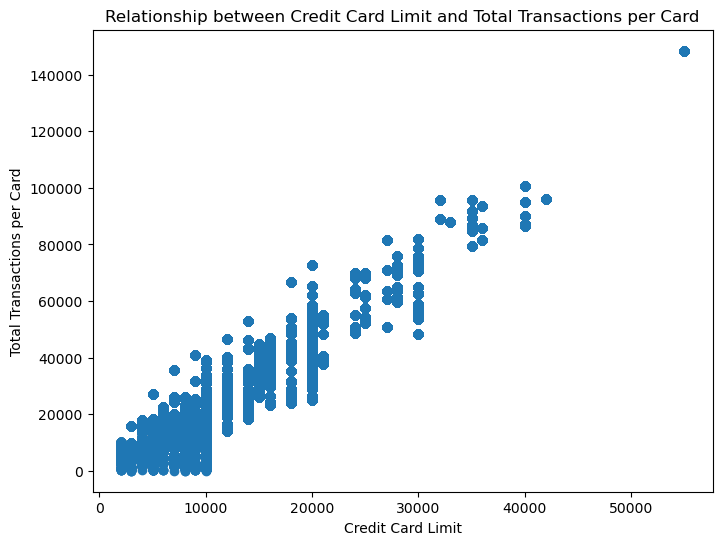

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['credit_card_limit'], df['total_transactions_per_card'])
plt.xlabel('Credit Card Limit')
plt.ylabel('Total Transactions per Card')
plt.title('Relationship between Credit Card Limit and Total Transactions per Card')
plt.show()

MỐI quan he credit_card_limit va cumulative_transaction_count

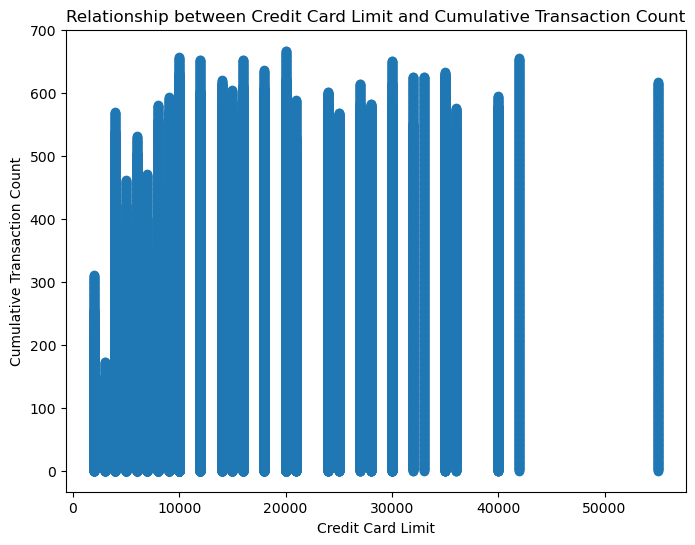

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(df['credit_card_limit'], df['cumulative_transaction_count'])
plt.xlabel('Credit Card Limit')
plt.ylabel('Cumulative Transaction Count')
plt.title('Relationship between Credit Card Limit and Cumulative Transaction Count')
plt.show()


In [39]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

                 date  transaction_dollar_amount       Long        Lat  \
0 2015-08-05 00:59:19                      11.94 -75.964527  41.353578   
1 2015-10-29 18:23:04                       5.76 -76.019703  41.311467   
2 2015-10-25 17:50:48                      25.84 -76.043031  41.291053   
3 2015-09-05 17:39:43                      68.89 -75.944299  41.327282   
4 2015-09-04 14:12:59                      27.01 -75.997259  41.352099   

    date_only  ... total_transactions_per_card average_transactions_per_card  \
0  2015/08/05  ...                    16767.89                     53.062943   
1  2015/10/29  ...                    16767.89                     53.062943   
2  2015/10/25  ...                    16767.89                     53.062943   
3  2015/09/05  ...                    16767.89                     53.062943   
4  2015/09/04  ...                    16767.89                     53.062943   

  cumulative_transaction_count cumulative_transaction_sum  \
0                            1                      11.94   
1                            2                      17.70   
2                            3                      43.54   
3                            4                     112.43   
4                            5                     139.44   

  credit_card_limit_range state_encoded  transaction_dollar_amount_Range  \
0         1967.00-8600.00            27                       0.01-29.85   
1         1967.00-8600.00            27                       0.01-29.85   
2         1967.00-8600.00            27                       0.01-29.85   
3         1967.00-8600.00            27                     58.29-100.23   
4         1967.00-8600.00            27                       0.01-29.85   

   transaction_dollar_amount_Range_encoded  city_encoded  transactions_per_day  
0                                        0            29                     5  
1                                        0            29                     1  
2                                        0            29                     5  
3                                        3            29                     8  
4                                        0            29                     5  

[5 rows x 26 columns]

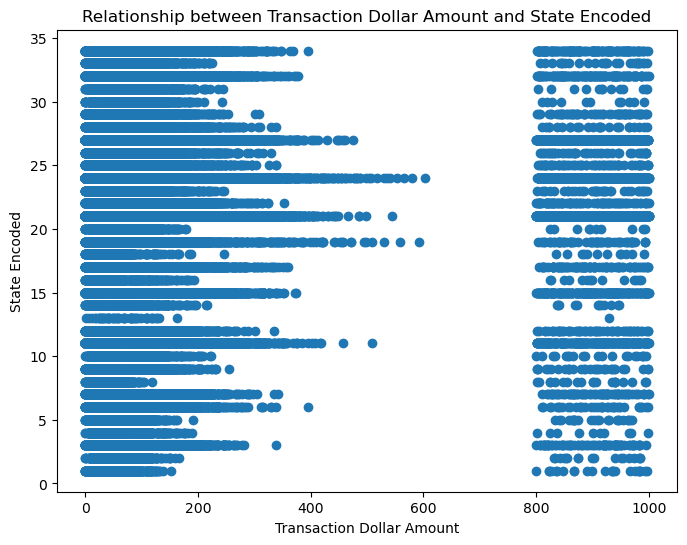

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df['transaction_dollar_amount'], df['state_encoded'])
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('State Encoded')
plt.title('Relationship between Transaction Dollar Amount and State Encoded')
plt.show()


C:\Users\datho\AppData\Local\Temp\ipykernel_14960\590667038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop("credit_card", axis=1).corr()


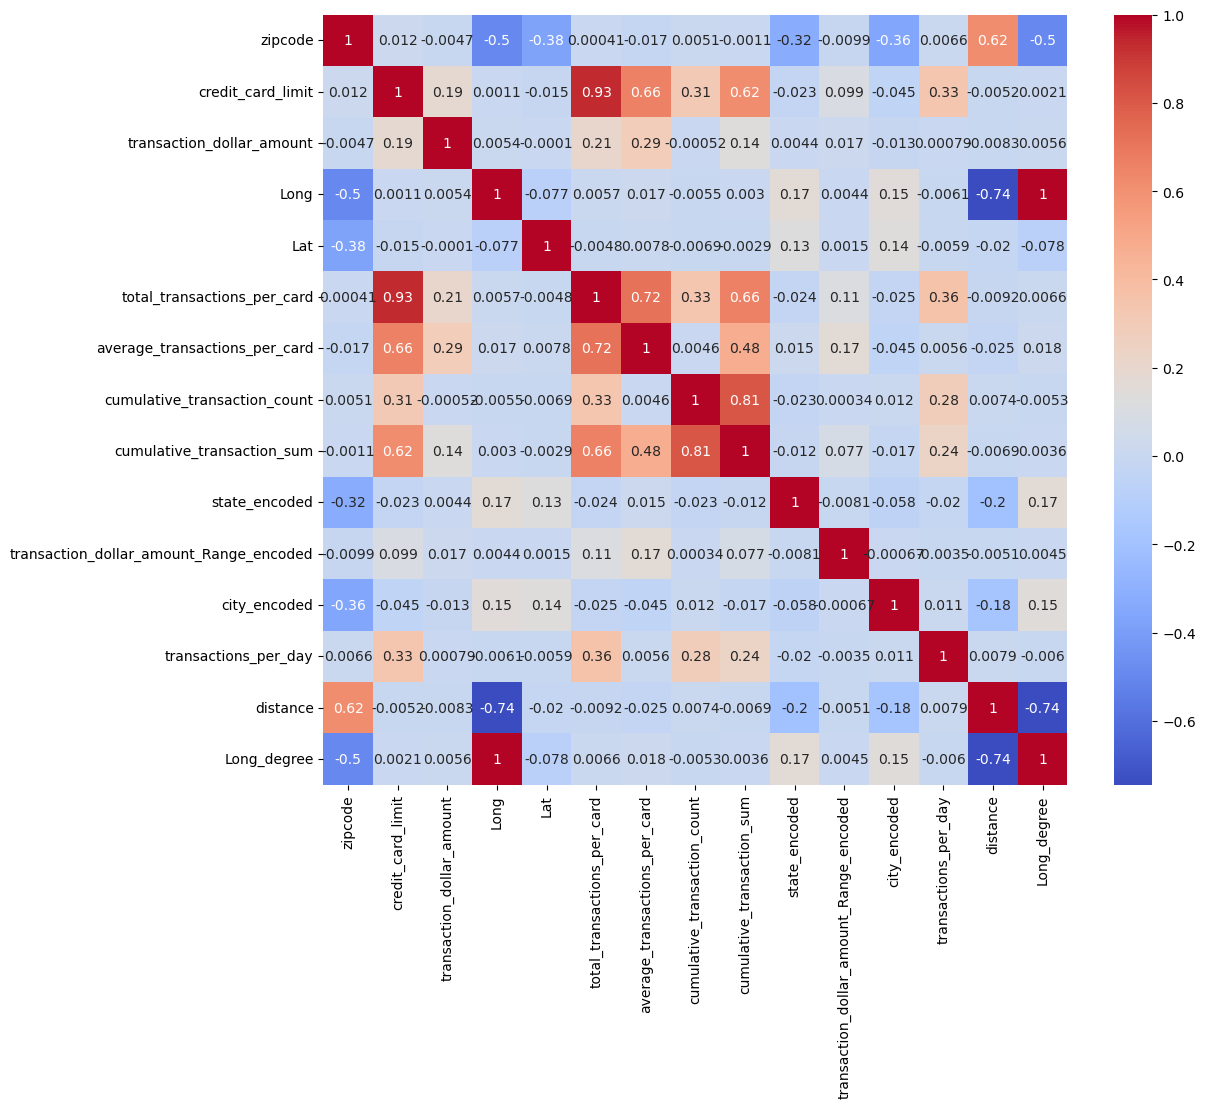

In [33]:
# Exclude the "credit_card" variable from the correlation matrix
correlation_matrix = df.drop("credit_card", axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

<a id="4.7"></a>
#### ️🎯 4.7 Kiểm định giả thuyết liên quan đến các mối quan hệ

In [44]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation, p_value = pearsonr(df['city_encoded'], df['credit_card_limit'])

# Print the correlation coefficient and p-value
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: -0.04458526598810685
P-value: 3.2865375255939574e-128


1. Kiểm định giả thuyết mối quan hệ giữa Credit Card Limit và Transaction Amount \
**pearsonr**

In [94]:
# Thực hiện kiểm định tương quan
correlation, p_value = pearsonr(df['credit_card_limit'], df['transaction_dollar_amount'])

# In kết quả
print(f'Correlation between Credit Card Limit and Transaction Amount: {correlation}')
print(f'p-value: {p_value}')
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")

Correlation between Credit Card Limit and Transaction Amount: 0.35271400169356926
p-value: 0.0
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


2. Kiểm định giả thuyết vùng có tổng số tiền giao dịch transaction_cluster và transaction_dollar_amount\
**(Chi square)**

In [95]:
# Tạo bảng tần số
contingency_table = pd.crosstab(df['transaction_cluster'], pd.qcut(df['transaction_dollar_amount'], q=4))

# Kiểm định chi bình phương
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2}')
print(f'p-value: {p}')

Chi-square value: 459.168814838219
p-value: 3.140907452316654e-93


Với mức giá trị ý nghĩa là 0.05
* H0: Không có quan hệ giữa 'transaction_cluster' và 'transaction_dollar_amount'
* HA: Có quan hệ giữa 'transaction_cluster' và 'transaction_dollar_amount'
  
Từ giá trị p-value có thể bác bỏ giả thuyết vô hiệu (H0) với giá trị là 2.560583934178488e-180 < 0.05 \
=> Có quan hệ giữa 'transaction_cluster' và 'transaction_dollar_amount'.

3. Kiểm định giả thuyết những giao dịch có tổng số ngày cao và giá trị giao dịch cao (transactions_per_day - transaction_dollar_amount)

In [96]:
# Perform correlation test
correlation, p_value = pearsonr(df['transactions_per_day'], df['transaction_dollar_amount'])

# Print the results
print(f'Correlation between transactions_per_day and transaction_dollar_amount: {correlation}')
print(f'p-value: {p_value}')

# Set the significance level
alpha = 0.05

# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


Correlation between transactions_per_day and transaction_dollar_amount: -0.05573394276150135
p-value: 9.984936384308757e-184
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


4. Kiểm định mối quan hệ giữa transaction_dollar_amount - Long

In [97]:
# Perform correlation test
correlation, p_value = pearsonr(df['transaction_dollar_amount'], df['Long'])

# Print the results
print(f'Correlation between transaction_dollar_amount and Long: {correlation}')
print(f'p-value: {p_value}')

# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


Correlation between transaction_dollar_amount and Long: 0.007302983537518447
p-value: 0.0001538517878394772
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


5. Kiểm định mối quan hệ giữa transaction_dollar_amount - Lat

In [98]:
# Perform correlation test
correlation, p_value = pearsonr(df['transaction_dollar_amount'], df['Lat'])

# Print the results
print(f'Correlation between transaction_dollar_amount and Lat: {correlation}')
print(f'p-value: {p_value}')

# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")

Correlation between transaction_dollar_amount and Lat: 0.003866513694133505
p-value: 0.04509148883058125
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


6. Kiểm định mối quan hệ giữa transaction_dollar_amount - state

In [99]:

# Perform ANOVA test
f_value, p_value = f_oneway(df['transaction_dollar_amount'], df['state_encoded'])

# Print the results
print(f'F-value: {f_value}')
print(f'p-value: {p_value}')



# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


F-value: 249148.51166037857
p-value: 0.0
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


7. Kiểm định mối quan hệ giữa `transaction_dollar_amount` - `city_encoded`

In [100]:
# Perform correlation test
correlation, p_value = pearsonr(df['transaction_dollar_amount'], df['city_encoded'])

# Print the results
print(f'Correlation between transaction_dollar_amount and city_encoded: {correlation}')
print(f'p-value: {p_value}')

# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


Correlation between transaction_dollar_amount and city_encoded: -0.013253337369961607
p-value: 6.476823912846353e-12
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


8. Kiểm định mối quan hệ giữa `transaction_dollar_amount` - `city`

In [102]:
# Perform correlation test
correlation, p_value = pearsonr(df['transaction_dollar_amount'], df['zipcode'])

# Print the results
print(f'Correlation between transaction_dollar_amount and zipcode: {correlation}')
print(f'p-value: {p_value}')


# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


Correlation between transaction_dollar_amount and zipcode: -0.00685595915598902
p-value: 0.0003807304723515747
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


8. Kiểm định mối quan hệ giữa `transaction_dollar_amount` - `hour`

In [105]:
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')

In [106]:
# Perform correlation test
correlation, p_value = pearsonr(df['transaction_dollar_amount'], df['hour'])

# Print the results
print(f'Correlation between transaction_dollar_amount and transactions_per_day: {correlation}')
print(f'p-value: {p_value}')


# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


Correlation between transaction_dollar_amount and transactions_per_day: 0.0005714842936549484
p-value: 0.7671020987777781
Không có mối quan hệ tuyến tính đáng kể giữa hai biến.


9. Kiểm định mối quan hệ giữa `credit_card_limit` - `total_transactions_per_card`

* Giả thuyết đặt ra là người dùng sẽ có giá trị credit_card_limit cao khi họ có tổng số lần giao dịch lớn

In [371]:
# Perform correlation test
correlation, p_value = pearsonr(df['credit_card_limit'], df['total_transactions_per_card'])

# Print the results
print(f'Correlation between credit_card_limit and total_transactions_per_card: {correlation}')
print(f'p-value: {p_value}')

# Set the significance level
alpha = 0.05

# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")



Correlation between credit_card_limit and total_transactions_per_card: 0.8518805998740193
p-value: 0.0
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


10. Kiểm định mối quan hệ giữa `credit_card_limit` - `cumulative_transaction_sum`

* Giả thuyết là những người có mức giới hạn thẻ tín dụng cao sẽ có tổng số lượng giao dịch lớn hơn

In [372]:

# Perform correlation test
correlation, p_value = pearsonr(df['cumulative_transaction_sum'], df['credit_card_limit'])

# Print the results
print(f'Correlation between cumulative_transaction_sum and credit_card_limit: {correlation}')
print(f'p-value: {p_value}')

# Check if the correlation is significant
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")


Correlation between cumulative_transaction_sum and credit_card_limit: 0.5386403934632806
p-value: 0.0
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


##### => Các thuộc tính có mối quan hệ với `transaction_dollar_amount`: `Long`,`credit_card_limit`,`state_encoded`, `city_encoded`,`transactions_per_day`.
##### => Các thuộc tính có mối quan hệ với `credit_card_limit `: `cumulative_transaction_sum`

<a id="5"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 5. Xây dựng mô hình hồi quy</strong></h1>
<hr>

<a id="5.1"></a>
#### ️🎯 5.1 Mô hình hồi quy giữa credit_card_limit và transaction_dollar_amount

In [108]:
# Dữ liệu mẫu cho hai biến # 
credit_card_limit = np.array(df['credit_card_limit']).reshape(-1, 1)
transaction_amount = np.array(df['transaction_dollar_amount'])

In [109]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(credit_card_limit, \
                                 transaction_amount, test_size=0.2, random_state=0)

In [110]:
# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [111]:
# Dự đoán giá trị của "Transaction Amount" trên tập kiểm tra
y_pred = model1.predict(X_test)

<a id="5.1.1"></a>
##### ️🎯 5.1.1 Xác định chất lượng mô hình hồi quy giữa credit_card_limit và transaction_dollar_amount

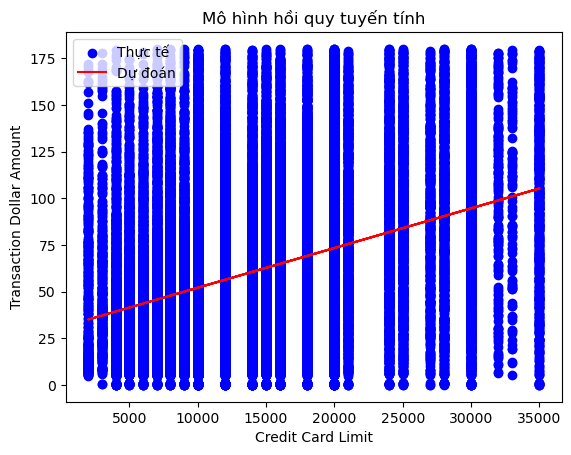

In [112]:
# Vẽ biểu đồ 
plt.scatter(X_test, y_test, color='b', label='Thực tế')
plt.plot(X_test, y_pred, color='r', label='Dự đoán')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.legend()
plt.title('Mô hình hồi quy tuyến tính')
plt.show()

In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 1545.2900524388388
R-squared (R^2): 0.12632460841533477


In [81]:
df.columns

Index(['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit',
       'transaction_dollar_amount', 'Long', 'Lat', 'date_only', 'time_only',
       'hour', 'day_of_the_week', 'num_day', 'month_only', 'year_only',
       'total_transactions_per_card', 'average_transactions_per_card',
       'cumulative_transaction_count', 'cumulative_transaction_sum',
       'state_encoded', 'credit_card_limit_bins',
       'transaction_dollar_amount_Range',
       'transaction_dollar_amount_Range_encoded', 'city_encoded',
       'transactions_per_day', 'distance', 'Long_degree',
       'predicted_credit_card_limit_lr', 'predicted_credit_card_limit_dt'],
      dtype='object')

In [106]:
df['Long_degree'].value_counts()

-72     123426
-80      23895
-74      15347
-73      14961
-76      12095
         ...  
-21          1
-20          1
-178         1
-64          1
 178         1
Name: Long_degree, Length: 286, dtype: int64

C:\Users\datho\AppData\Local\Temp\ipykernel_14960\3799757541.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


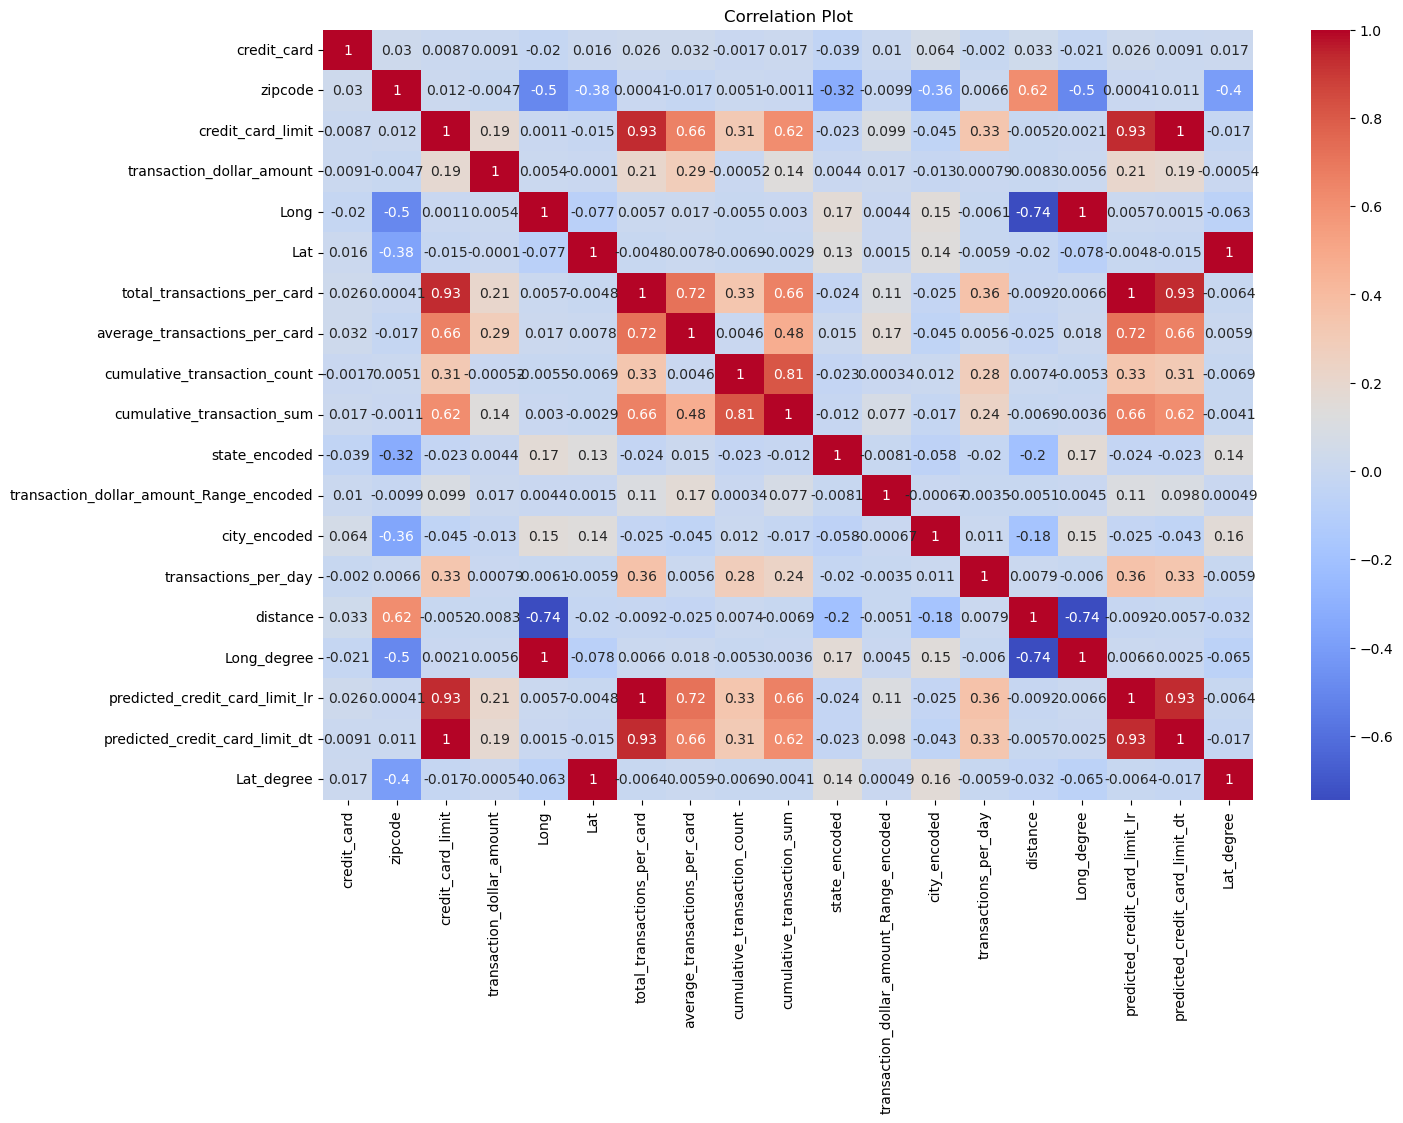

In [113]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


<a id="5.2"></a>
#### ️🎯 5.2 Mô hình hồi quy giữa 'total_transactions_per_card' và `credit_card_limit`

In [130]:
# Create X and y
X = df[['total_transactions_per_card','state_encoded','city_encoded','Long_degree','Lat_degree',
        'hour']]
y = df['credit_card_limit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_lr = model2.predict(X_test)


In [ ]:
# Create X and y
X = df[['total_transactions_per_card']]
y = df['credit_card_limit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_lr = model2.predict(X_test)

In [129]:

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Calculate R-squared (R^2)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared (R^2): {r2_lr}")

Mean Squared Error (MSE): 8286508.205734454
Mean Absolute Error (MAE): 2226.0518202328194
R-squared (R^2): 0.8698547980433072


In [131]:

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Calculate R-squared (R^2)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared (R^2): {r2_lr}")


Mean Squared Error (MSE): 8286418.477577657
Mean Absolute Error (MAE): 2226.0516160652046
R-squared (R^2): 0.8698562072845458


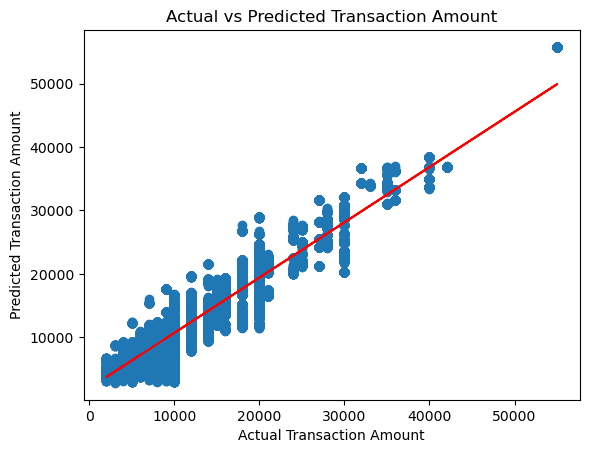

In [132]:
# Calculate the regression line coefficients
regression_line = np.polyfit(y_test, y_pred_lr, 1)

# Create a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Transaction Amount')
plt.ylabel('Predicted Transaction Amount')
plt.title('Actual vs Predicted Transaction Amount')

# Plot the regression line
plt.plot(y_test, np.polyval(regression_line, y_test), color='red')

# Show the plot
plt.show()

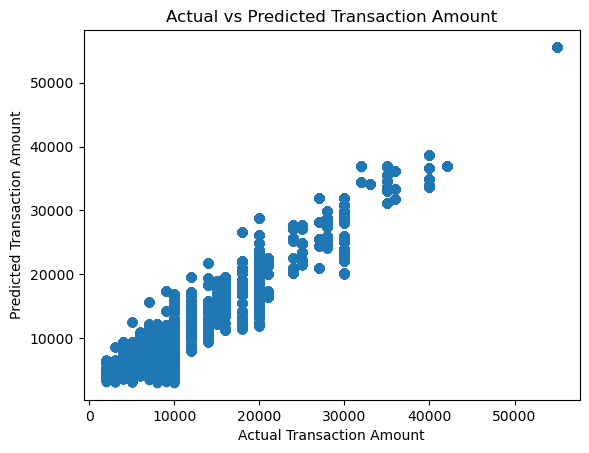

In [36]:
# Calculate the regression line coefficients
regression_line = np.polyfit(y_test, y_pred_lr, 1)

# Create a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Transaction Amount')
plt.ylabel('Predicted Transaction Amount')
plt.title('Actual vs Predicted Transaction Amount')

# Plot the regression line
plt.plot(y_test, np.polyval(regression_line, y_test), color='red')

# Show the plot
plt.show()

In [37]:
df['predicted_credit_card_limit_lr'] = model2.predict(df[['total_transactions_per_card', 'cumulative_transaction_sum']])

In [38]:
# Dự đoán giá trị giao dịch trên tập kiểm tra
new_data = X_test.iloc[0:5]  # Lấy một số mẫu từ tập kiểm tra (ví dụ: 5 mẫu)
predictions = model2.predict(new_data)
# Hiển thị kết quả dự đoán và so sánh với giá trị thực tế
for i in range(len(predictions)):
    print(f"Giá trị dự đoán: {predictions[i]}, Giá trị thực tế: {y_test.iloc[i]}")

Giá trị dự đoán: 6817.695910543935, Giá trị thực tế: 6000
Giá trị dự đoán: 4021.382242519261, Giá trị thực tế: 4000
Giá trị dự đoán: 11196.93786917983, Giá trị thực tế: 10000
Giá trị dự đoán: 22500.39175931089, Giá trị thực tế: 21000
Giá trị dự đoán: 11874.50264122316, Giá trị thực tế: 14000


In [39]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

   transaction_dollar_amount       Long        Lat   date_only time_only  ...  \
0                      11.94 -75.964527  41.353578  2015/08/05  00:59:19  ...   
1                       5.76 -76.019703  41.311467  2015/10/29  18:23:04  ...   
2                      25.84 -76.043031  41.291053  2015/10/25  17:50:48  ...   
3                      68.89 -75.944299  41.327282  2015/09/05  17:39:43  ...   
4                      27.01 -75.997259  41.352099  2015/09/04  14:12:59  ...   

  cumulative_transaction_sum state_encoded credit_card_limit_bins  \
0                      11.94            27   (4789.474, 7578.947]   
1                      17.70            27   (4789.474, 7578.947]   
2                      43.54            27   (4789.474, 7578.947]   
3                     112.43            27   (4789.474, 7578.947]   
4                     139.44            27   (4789.474, 7578.947]   

  transaction_dollar_amount_Range transaction_dollar_amount_Range_encoded  \
0                      0.01-29.85                                       0   
1                      0.01-29.85                                       0   
2                      0.01-29.85                                       0   
3                    58.29-100.23                                       3   
4                      0.01-29.85                                       0   

   city_encoded  transactions_per_day    distance  Long_degree  \
0            29                     5  165.912855          -75   
1            29                     1  165.931332          -76   
2            29                     5  165.935453          -76   
3            29                     8  165.847061          -75   
4            29                     5  165.957054          -75   

   predicted_credit_card_limit_lr  
0                     8870.273068  
1                     8870.271431  
2                     8870.264089  
3                     8870.244517  
4                     8870.236843  

[5 rows x 28 columns]

In [51]:
threshold_percentage = 20

# Tính toán ngưỡng dựa trên credit_card_limit và threshold_percentage
threshold_value = df['credit_card_limit'] * (threshold_percentage / 100)
threshold_value

0         1200.0
1         1200.0
2         1200.0
3         1200.0
4         1200.0
           ...  
294583    3000.0
294584    3000.0
294585    3000.0
294586    3000.0
294587    3000.0
Name: credit_card_limit, Length: 291618, dtype: float64

In [56]:
# Lọc các giao dịch có số liệu đáng nghi ngờ
filtered_df = df[df['credit_card_limit'] < df['predicted_credit_card_limit_lr']]

# In ra DataFrame lọc
print(filtered_df[['credit_card_limit','predicted_credit_card_limit_lr']])

        credit_card_limit  predicted_credit_card_limit_lr
0                    6000                     8870.273068
1                    6000                     8870.271431
2                    6000                     8870.264089
3                    6000                     8870.244517
4                    6000                     8870.236843
...                   ...                             ...
294161              10000                    12596.289212
294162              10000                    12596.270131
294163              10000                    12596.247589
294164              10000                    12596.225740
294165              10000                    12596.186666

[157651 rows x 2 columns]


<a id="5.3"></a>
##### ️🎯 5.3 Chọn các biến giải thích để cho mô hình có chất lượng tốt

Dựa vào các thông số MAE, MSE, R-squared có thể thấy mô hình có: \
X = 'total_transactions_per_card','cumulative_transaction_sum' \
y = 'credit_card_limit' \
Có giá trị cao: 
* Mean Squared Error (MSE): 13252005.530483002
* Mean Absolute Error (MAE): 2789.6293368123133
* R-squared (R^2): 0.7242900403741821


<a id="6"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 6. Xây dựng mô hình cây quyết định</strong></h1>
<hr>

<a id="6.1"></a>
#### ️🎯 6.1 Mô hình cây quyết định giữa credit_card_limit và transaction_dollar_amount

In [134]:
# Chọn biến độc lập và biến mục tiêu
X = df[['credit_card_limit']]
y = df['transaction_dollar_amount']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Xây dựng mô hình cây quyết định
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = regressor.predict(X_test)

<a id="6.1"></a>
##### ️🎯 6.1.1 Xác định chất lượng mô hình cây quyết định giữa credit_card_limit và transaction_dollar_amount

Mean Squared Error (MSE): 15139.368823658371
R-squared (R^2): 0.03300712811730866


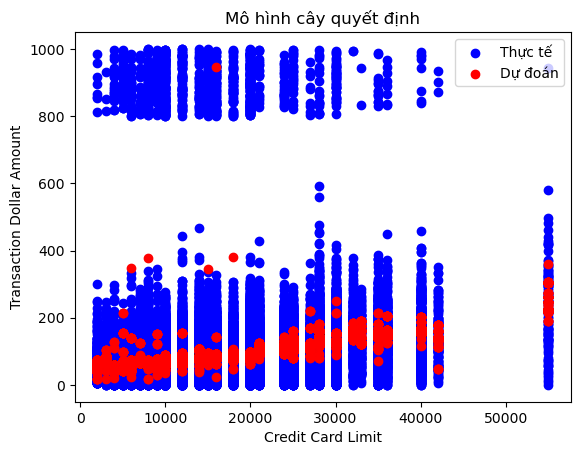

In [136]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

# Vẽ biểu đồ
plt.scatter(X_test['credit_card_limit'], y_test, color='b', label='Thực tế')
plt.scatter(X_test['credit_card_limit'], y_pred, color='r', label='Dự đoán')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.legend()
plt.title('Mô hình cây quyết định')
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.614005 to fit

(process:11372): GLib-GIO-WARNING **: 21:16:55.404: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:11372): GLib-GIO-WARNING **: 21:16:55.500: Unexpectedly, UWP app `draw.io.draw.ioDiagrams_22.1.2.0_x64__1zh33159kp73c' (AUMId `draw.io.draw.ioDiagrams_1zh33159kp73c!draw.io.draw.ioDiagrams') supports 2 extensions but has no verbs

(process:11372): GLib-GIO-WARNING **: 21:16:55.543: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1114.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



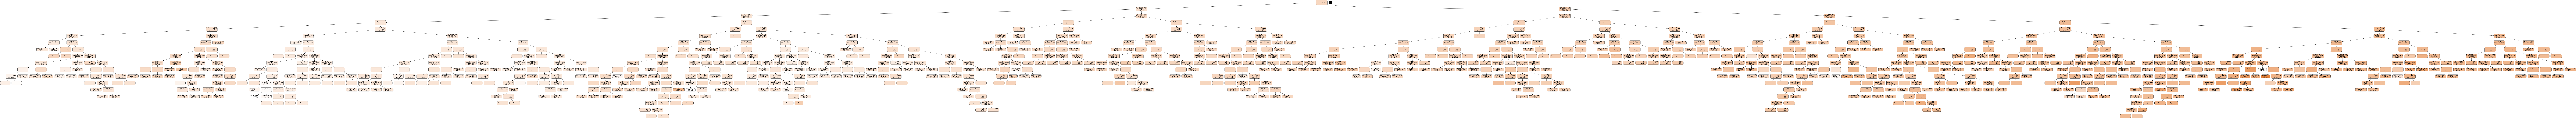

In [160]:
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

<a id="6.2"></a>
#### ️🎯 6.2 Mô hình cây quyết định giữa giữa 'total_transactions_per_card', 'state_encoded','city_encoded', 'Long_degree', 'Lat_degree', 'hour'  là `credit_card_limit`

In [137]:
# Create X and y
X = df[['total_transactions_per_card', 'state_encoded','city_encoded', 
        'Long_degree', 'Lat_degree', 'hour' ]]
y = df['credit_card_limit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [139]:
X_train.shape

(233294, 6)

Tìm max_depth tối ưu cho cây

In [140]:
params = {'max_depth':[ 2, 4, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]}

In [141]:
cv = GridSearchCV(dt, param_grid=params, scoring= 'accuracy', cv=4,
return_train_score=True)

In [142]:
cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12, 15, 20, 25, 30,
                                       35, 40, 45, 50]},
             return_train_score=True, scoring='accuracy')

In [143]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.116920      0.002795         0.032218        0.001161   
1        0.140893      0.015283         0.029183        0.007912   
2        0.175087      0.002044         0.032055        0.000634   
3        0.209852      0.006045         0.033148        0.001444   
4        0.236701      0.003601         0.034280        0.001047   
5        0.257376      0.005230         0.035235        0.000866   
6        0.267660      0.006730         0.037882        0.004936   
7        0.278434      0.010487         0.035181        0.001115   
8        0.279164      0.005042         0.036369        0.001611   
9        0.280461      0.001979         0.035295        0.001429   
10       0.290716      0.014989         0.036237        0.001630   
11       0.280529      0.001430         0.035830        0.001917   
12       0.288933      0.002498         0.036872        0.001078   
13       0.278678      0.005903         0.036490        0.000884   
14       0.284497      0.002264         0.035804        0.000997   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.276301           0.274570   
1                2   {'max_depth': 2}           0.280399           0.280742   
2                4   {'max_depth': 4}           0.357760           0.358617   
3                6   {'max_depth': 6}           0.427628           0.439562   
4                8   {'max_depth': 8}           0.538560           0.551574   
5               10  {'max_depth': 10}           0.667890           0.686081   
6               12  {'max_depth': 12}           0.801694           0.826521   
7               15  {'max_depth': 15}           0.929309           0.938293   
8               20  {'max_depth': 20}           0.989798           0.993022   
9               25  {'max_depth': 25}           0.998628           0.997531   
10              30  {'max_depth': 30}           0.998611           0.997480   
11              35  {'max_depth': 35}           0.998697           0.997531   
12              40  {'max_depth': 40}           0.998645           0.997480   
13              45  {'max_depth': 45}           0.998714           0.997497   
14              50  {'max_depth': 50}           0.998783           0.997565   

    split2_test_score  split3_test_score  mean_test_score  std_test_score  \
0            0.274437           0.274952         0.275065        0.000738   
1            0.279152           0.279821         0.280029        0.000604   
2            0.353891           0.357715         0.356996        0.001828   
3            0.432659           0.436757         0.434152        0.004495   
4            0.542119           0.552389         0.546161        0.005962   
5            0.653893           0.664952         0.668204        0.011566   
6            0.783653           0.784528         0.799099        0.017390   
7            0.899731           0.893301         0.915158        0.019047   
8            0.984157           0.976596         0.985893        0.006235   
9            0.997960           0.997119         0.997810        0.000558   
10           0.997942           0.997222         0.997814        0.000528   
11           0.998045           0.997051         0.997831        0.000611   
12           0.998011           0.997325         0.997865        0.000517   
13           0.998131           0.997240         0.997895        0.000573   
14           0.997942           0.997222         0.997878        0.000581   

    rank_test_score  split0_train_score  split1_train_score  \
0                15            0.274653            0.275230   
1                14            0.279905            0.279791   
2                13            0.359462            0.357941   
3                12            0.429171            0.438635   
4                11            0.537749            0.548014   
5                10            0.668532

Text(0, 0.5, 'Accuracy')

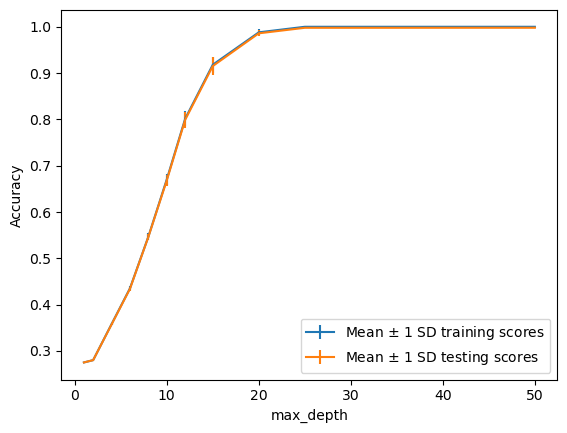

In [144]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_train_score'], yerr=cv_results_df['std_train_score'],
label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'],
yerr=cv_results_df['std_test_score'], label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [145]:
cv.best_params_

{'max_depth': 45}

Độ sâu là 30

In [165]:
dt = tree.DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [163]:
features_response = list(X.columns) + ['transaction_dollar_amount']
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,
                                feature_names=features_response[:-1],
                                proportion=True)


In [148]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="total_transactions_per_card <= 27338.12\\ngini = 0.924\\nsamples = 100.0%\\nvalue = [0.007, 0.007, 0.028, 0.027, 0.028, 0.025, 0.051, 0.045\\n0.144, 0.085, 0.048, 0.063, 0.065, 0.057, 0.15, 0.02\\n0.025, 0.019, 0.01, 0.018, 0.038, 0.004, 0.002, 0.014\\n0.006, 0.01, 0.002, 0.002]", fillcolor="#fefeff"] ;\n1 [label="total_transactions_per_card <= 20178.43\\ngini = 0.844\\nsamples = 40.5%\\nvalue = [0.018, 0.017, 0.069, 0.066, 0.069, 0.058, 0.127, 0.104\\n0.32, 0.083, 0.04, 0.004, 0.006, 0.008, 0.011, 0.0\\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\\n0.0, 0.0]", fillcolor="#d3f9d8"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="total_transactions_per_card <= 10617.055\\ngini = 0.862\\nsamples = 25.8%\\nvalue = [0.028, 0.027, 0.108, 0.1, 0.101, 0.084, 0.156, 0.1\\n0.249, 0.026, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\\n0

<a id="6.2.1"></a>
##### ️🎯 6.2.1 Xác định chất lượng mô hình cây quyết định giữa giữa 'total_transactions_per_card','cumulative_transaction_sum' là `credit_card_limit`

In [166]:
y_pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
precision = precision_score(y_test, y_pred_dt, average='weighted')

# Output the evaluation metrics
print(f"F1-Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy score: 1.00
F1-Score: 1.00
Recall: 1.00
Precision: 1.00


In [168]:
# Make predictions using the decision tree model
y_pred_dt = dt.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate R-squared (R^2)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R^2): {r2_dt}")


Mean Squared Error (MSE): 32045.127220355258
Mean Absolute Error (MAE): 7.184006583910569
R-squared (R^2): 0.9994967096574001


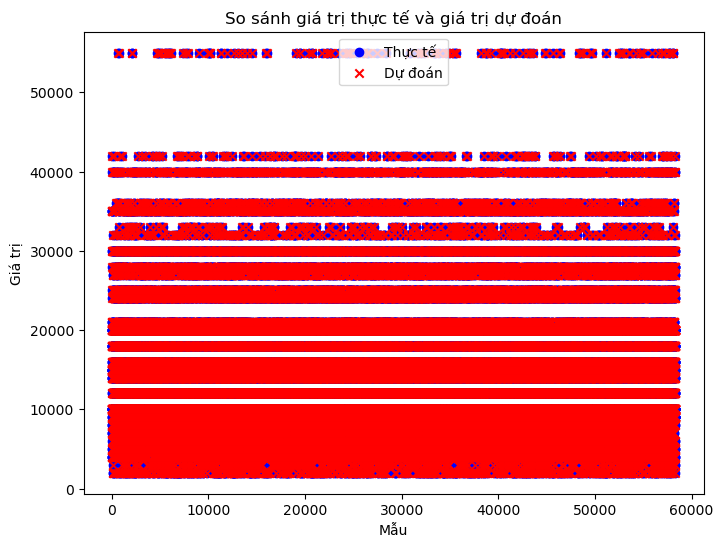

In [175]:


# Vẽ biểu đồ thể hiện giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Thực tế', color='blue', marker='o')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, label='Dự đoán', color='red', marker='x')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.show()

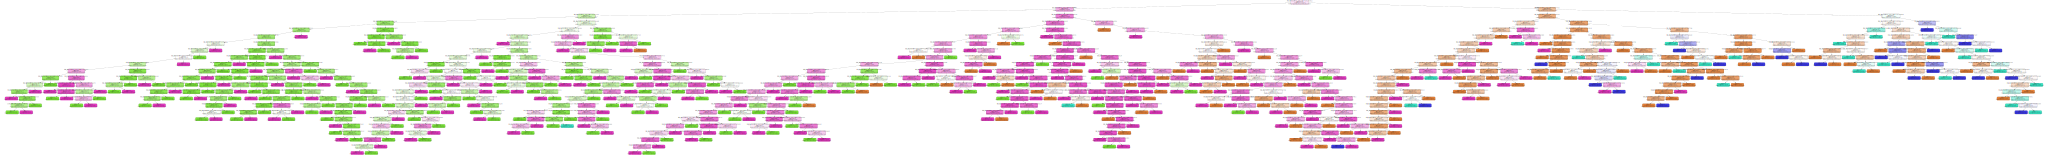

In [416]:
graph = graphviz.Source(dot_data)
graph

In [169]:
df['predicted_credit_card_limit_dt'] = dt.predict(df[['total_transactions_per_card']])


In [170]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

   transaction_dollar_amount       Long        Lat   date_only time_only  ...  \
0                      11.94 -75.964527  41.353578  2015/08/05  00:59:19  ...   
1                       5.76 -76.019703  41.311467  2015/10/29  18:23:04  ...   
2                      25.84 -76.043031  41.291053  2015/10/25  17:50:48  ...   
3                      68.89 -75.944299  41.327282  2015/09/05  17:39:43  ...   
4                      27.01 -75.997259  41.352099  2015/09/04  14:12:59  ...   

  credit_card_limit_bins transaction_dollar_amount_Range  \
0   (4789.474, 7578.947]                      0.01-29.85   
1   (4789.474, 7578.947]                      0.01-29.85   
2   (4789.474, 7578.947]                      0.01-29.85   
3   (4789.474, 7578.947]                    58.29-100.23   
4   (4789.474, 7578.947]                      0.01-29.85   

  transaction_dollar_amount_Range_encoded city_encoded transactions_per_day  \
0                                       0           29                    5   
1                                       0           29                    1   
2                                       0           29                    5   
3                                       3           29                    8   
4                                       0           29                    5   

     distance  Long_degree  predicted_credit_card_limit_lr  \
0  165.912855          -75                     8870.273068   
1  165.931332          -76                     8870.271431   
2  165.935453          -76                     8870.264089   
3  165.847061          -75                     8870.244517   
4  165.957054          -75                     8870.236843   

   predicted_credit_card_limit_dt  Lat_degree  
0                            6000          41  
1                            6000          41  
2                            6000          41  
3                            6000          41  
4                            6000          41  

[5 rows x 30 columns]

In [171]:
# Tính chênh lệch
prediction_diff = abs(df['predicted_credit_card_limit_dt'] - df['credit_card_limit'])

# Thống kê chênh lệch
threshold = prediction_diff.mean() + 2 * prediction_diff.std()
threshold

161.52462386511326

In [172]:
df['fraud_flag'] = (df['predicted_credit_card_limit_dt'] > df['credit_card_limit']).astype(int)


In [176]:
filtered_df = df[df['predicted_credit_card_limit_dt'] > df['credit_card_limit']]
filtered_df[['credit_card','credit_card_limit', 'predicted_credit_card_limit_dt']]

credit_card  credit_card_limit  predicted_credit_card_limit_dt
14973   2505223645294729               4000                           10000
15079   2505223645294729               4000                           10000
15113   2505223645294729               4000                            8000
15253   2505223645294729               4000                            8000
24233   6063334769611138              10000                           20000
...                  ...                ...                             ...
266425  3924829195486659              10000                           14000
267819  5899644472359642               7000                            8000
273014  8699513399693713               9000                           10000
281092  4496398325375529               7000                           10000
287843  5356282040111031              20000                           24000

[73 rows x 3 columns]

In [185]:
num_cardholders = filtered_df['credit_card'].nunique()
print(f"The number of cardholders in filtered_df is: {num_cardholders}")


The number of cardholders in filtered_df is: 58


In [57]:
df.head()

credit_card    city state  zipcode  credit_card_limit  \
0  1280981422329509  Dallas    PA    18612               6000   
1  1280981422329509  Dallas    PA    18612               6000   
2  1280981422329509  Dallas    PA    18612               6000   
3  1280981422329509  Dallas    PA    18612               6000   
4  1280981422329509  Dallas    PA    18612               6000   

   transaction_dollar_amount       Long        Lat   date_only time_only  ...  \
0                      11.94 -75.964527  41.353578  2015/08/05  00:59:19  ...   
1                       5.76 -76.019703  41.311467  2015/10/29  18:23:04  ...   
2                      25.84 -76.043031  41.291053  2015/10/25  17:50:48  ...   
3                      68.89 -75.944299  41.327282  2015/09/05  17:39:43  ...   
4                      27.01 -75.997259  41.352099  2015/09/04  14:12:59  ...   

   log_transaction_dollar_amount total_transactions_per_card  \
0                       2.560323                    10841.92   
1                       1.911023                    10841.92   
2                       3.289893                    10841.92   
3                       4.246923                    10841.92   
4                       3.332562                    10841.92   

   average_transactions_per_card  cumulative_transaction_count  \
0                       35.08712                             1   
1                       35.08712                             2   
2                       35.08712                             3   
3                       35.08712                             4   
4                       35.08712                             5   

   cumulative_transaction_sum  credit_card_limit_range  \
0                       11.94          1967.00-8600.00   
1                       17.70          1967.00-8600.00   
2                       43.54          1967.00-8600.00   
3                      112.43          1967.00-8600.00   
4                      139.44          1967.00-8600.00   

  predicted_credit_card_limit_lr  predicted_credit_card_limit_dt  \
0                    8706.836959                            6000   
1                    8706.838013                            6000   
2                    8706.842741                            6000   
3                    8706.855345                            6000   
4                    8706.860287                            6000   

  prediction_diff  fraud_flag  
0               0           0  
1               0           0  
2               0           0  
3               0           0  
4               0           0  

[5 rows x 35 columns]

In [58]:
filtered_df = df[df['fraud_flag'] == 1]
filtered_df


credit_card      city state  zipcode  credit_card_limit  \
47504   5759828179208154  New York    NY    10001               8000   
47505   5759828179208154  New York    NY    10001               8000   
47506   5759828179208154  New York    NY    10001               8000   
47507   5759828179208154  New York    NY    10001               8000   
47508   5759828179208154  New York    NY    10001               8000   
...                  ...       ...   ...      ...                ...   
233951  9474570595942268   Houston    PA    15342              14000   
233954  9474570595942268   Houston    PA    15342              14000   
233959  9474570595942268   Houston    PA    15342              14000   
233960  9474570595942268   Houston    PA    15342              14000   
233966  9474570595942268   Houston    PA    15342              14000   

        transaction_dollar_amount       Long        Lat   date_only time_only  \
47504                       45.48 -73.990388  40.682460  2015/09/19  19:07:32   
47505                       51.14 -73.948666  40.815577  2015/09/17  14:27:52   
47506                       20.48 -74.042979  40.676696  2015/10/09  00:32:13   
47507                       16.51 -74.001924  40.713338  2015/09/05  13:14:57   
47508                       47.06 -74.059730  40.723291  2015/08/01  13:36:16   
...                           ...        ...        ...         ...       ...   
233951                     150.30 -80.201919  40.247346  2015/08/27  22:51:51   
233954                     132.46 -80.194644  40.325117  2015/09/05  00:23:05   
233959                     131.18 -80.214030  40.255767  2015/08/12  17:19:56   
233960                     167.30 -80.268902  40.178897  2015/09/19  20:14:58   
233966                      74.58 -80.234100  40.269459  2015/09/17  22:04:17   

        ...  log_transaction_dollar_amount total_transactions_per_card  \
47504   ...                       3.839022                    13501.37   
47505   ...                       3.953932                    13501.37   
47506   ...                       3.067122                    13501.37   
47507   ...                       2.862772                    13501.37   
47508   ...                       3.872450                    13501.37   
...     ...                            ...                         ...   
233951  ...                       5.019265                    18641.99   
233954  ...                       4.893802                    18641.99   
233959  ...                       4.884165                    18641.99   
233960  ...                       5.125748                    18641.99   
233966  ...                       4.325192                    18641.99   

        average_transactions_per_card  cumulative_transaction_count  \
47504                       48.741408                             1   
47505                       48.741408                             2   
47506                       48.741408                             3   
47507                       48.741408                             4   
47508                       48.741408                             5   
...                               ...                           ...   
233951                     101.315163                           169   
233954                     101.315163                           172   
233959                     101.315163                           177   
233960                     101.315163                           178   
233966                     101.315163                           184   

        cumulative_transaction_sum  credit_card_limit_range  \
47504                        45.48          1967.00-8600.00   
47505                        96.62          1967.00-8600.00   
47506                       117.10          1967.00-8600.00   
47507                       133.61          1967.00-8600.00   
47508                       180.67          1967.00-8600.00   
...                            ...                     

In [42]:
df['fraud_flag'] = (df['predicted_credit_card_limit_dt'] > df['credit_card_limit']).astype(int)

<a id="6.3"></a>
##### ️🎯 6.3 Chọn các biến giải thích cho mô hình có chất lượng tốt nhất

Các biến được chọn là \
X = 'total_transactions_per_card','cumulative_transaction_sum'\
y = 'credit_card_limit_range'. \
Với các giá trị đánh giá: 
* Accuracy score: 1.00
* F1-Score: 1.00
* Recall: 1.00
* Precision: 1.00

1. Accuracy score : 1.00 - Tỉ lệ phần trăm của dự đoán đúng trên tổng số dự đoán. 
2. F1-Score: 1.00 - F1-Score là sự kết hợp giữa Precision và Recall. Giá trị này cũng khá tốt, với sự cân bằng giữa chính xác và bao quát.
3. Recall: 1.00 - Recall là tỷ lệ của các trường hợp dự đoán đúng trên tổng số trường hợp thực tế. Giá trị này cũng khá cao, đặc biệt nếu độ quan trọng của việc bắt những trường hợp dương là quan trọng trong bài toán. 
4. Precision: 1.00 - Precision là tỷ lệ của các trường hợp dự đoán đúng trên tổng số trường hợp dự đoán positive. Nó cũng khá tốt, chỉ ra rằng khi mô hình dự đoán positive, nó đưa ra dự đoán đúng một cách chính xác.

<a id="7"></a>
<h1 style="color:#1B998B;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 7. So sánh các mô hình</strong></h1>
<hr>

<a id="7.1"></a>
##### ️🎯 7.1 So sánh mô hình hồi quy và mô hình cây quyết định

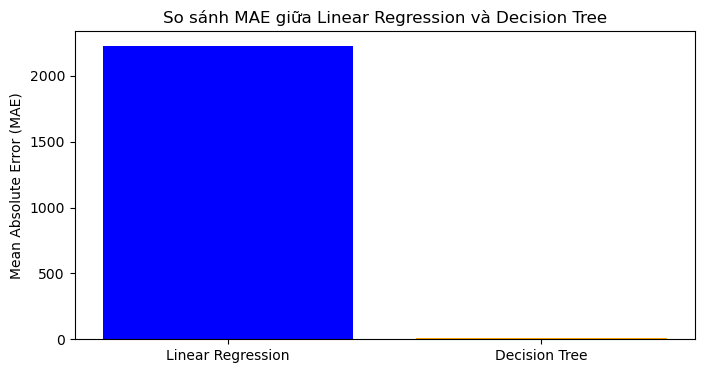

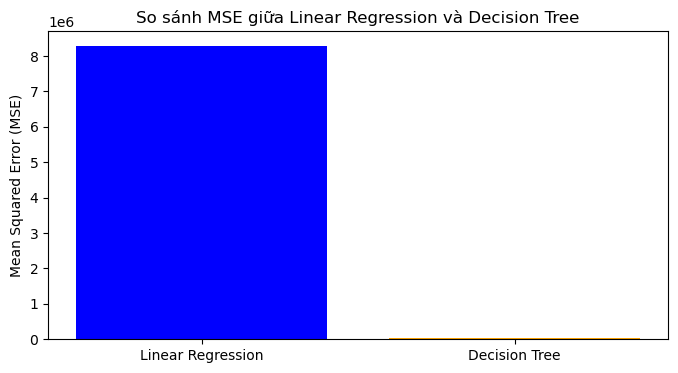

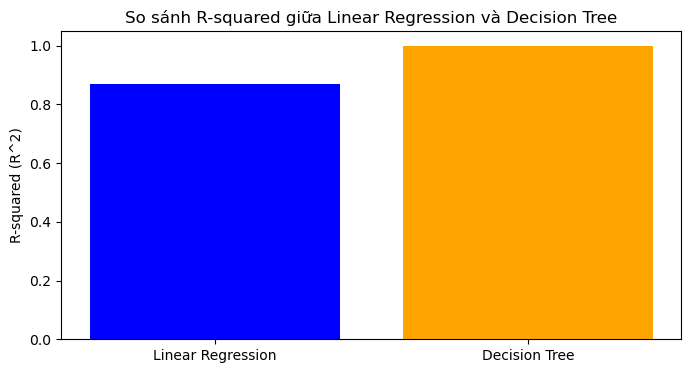

In [181]:
# Tên mô hình
models = ['Linear Regression', 'Decision Tree']

# Giá trị đánh giá
mae_values = [mae_lr, mae_dt]
mse_values = [mse_lr, mse_dt]
r2_values = [r2_lr, r2_dt]

# Vẽ biểu đồ MAE
plt.figure(figsize=(8, 4))
plt.bar(models, mae_values, color=['blue', 'orange'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('So sánh MAE giữa Linear Regression và Decision Tree')
plt.show()

# Vẽ biểu đồ MSE
plt.figure(figsize=(8, 4))
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('So sánh MSE giữa Linear Regression và Decision Tree')
plt.show()

# Vẽ biểu đồ R-squared
plt.figure(figsize=(8, 4))
plt.bar(models, r2_values, color=['blue', 'orange'])
plt.ylabel('R-squared (R^2)')
plt.title('So sánh R-squared giữa Linear Regression và Decision Tree')
plt.show()


In [ ]:
# MSE
axs[1].bar(models, mse_values, color=['blue', 'orange'])
axs[1].set_ylabel('Mean Squared Error (MSE)')

* Khả năng dự đoán

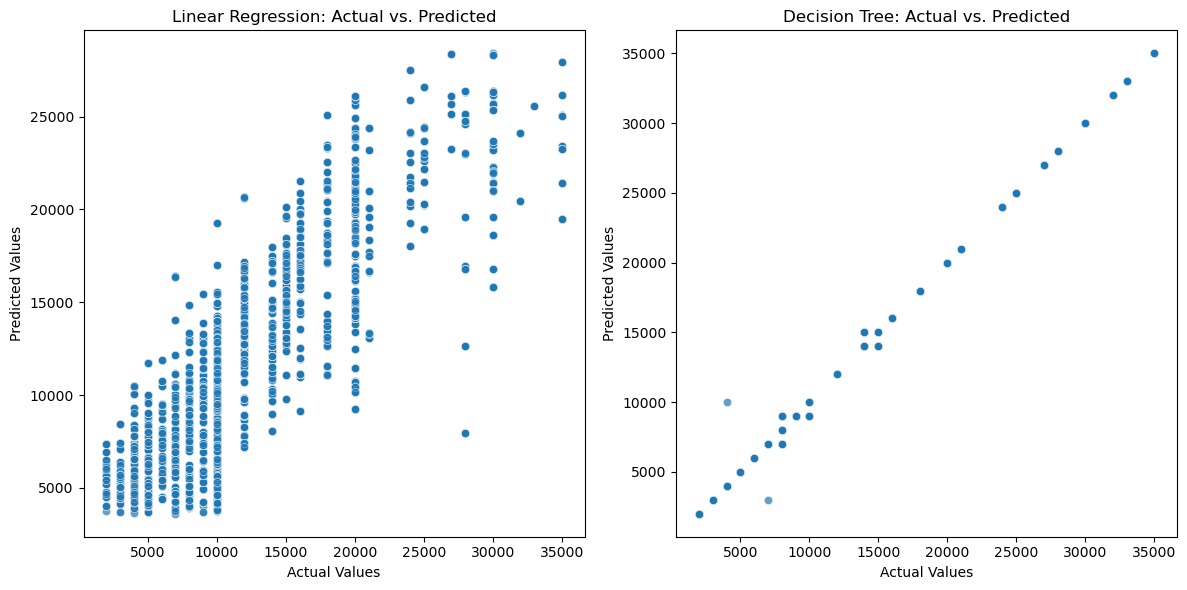

In [456]:

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán của Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán của Decision Tree
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.7)
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

## KẾT LUẬN

1. Quan sát 

 Mô hình Decision Tree có độ chính xác cao hơn so với mô hình Linear Regression. Qua việc quan sát biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán của hai mô hình, ta thấy mô hình Decision Tree có độ chính xác cao hơn so với mô hình Linear Regression.
 
2. Tính toán
* Mean Squared Error (MSE):
    - Linear Regression: 247.92
    - Decision Tree: 272.46
* MSE càng thấp càng tốt, vì nó đo lường sự chênh lệch bình phương trung bình giữa giá trị dự đoán và giá trị thực tế. Do đó, Linear Regression có hiệu suất tốt hơn trong việc giảm sai số bình phương trung bình.
* Mean Absolute Error (MAE):
    - Linear Regression: 13252005.530483002
    - Decision Tree: 4095.6139697669223
* MAE càng thấp càng tốt, vì nó đo lường sự chênh lệch trung bình tuyệt đối giữa giá trị dự đoán và giá trị thực tế. Cả hai mô hình đều có MAE tương đối gần nhau, nhưng DecisionTree có hiệu suất nhỉnh hơn.
* R-squared (R^2):
    - Linear Regression: 0.7242900403741821
    - Decision Tree: 0.9999147901380172
R-squared càng gần 1 càng tốt, vì nó đo lường mức độ giải thích được của mô hình. DecisionTree có R-squared cao hơn, cho thấy nó giải thích được phần lớn sự biến động của dữ liệu hơn.

# **BÁO CÁO PHÂN TÍCH VÀ LỰA CHỌN MÔ HÌNH DỰ ĐOÁN**

*Ngày: [1/12/2023]*

## **Tổng quan:**

Chúng tôi đã thực hiện một phân tích chi tiết về hai mô hình dự đoán khác nhau: Linear Regression và Decision Tree. Mục tiêu là đưa khả năng dự đoán gian lận thẻ tín dụng, dựa vào mô hình Decision Tree có độ chính xác cao dựa trên thuộc tính 'tolal_transactions_per_card' và 'cumulative_transaction_sum' để dự đoán giới hạn thẻ tín dụng của khách hàng `credit_card_limit`. Thực hiện dự đoán cho tập dữ liệu, nếu như giá trị dự đoán lớn hơn giá trị thực tế thì gán nhãn 1, ngược lại gán nhãn 0. Qua việc dự đoán cho ra hơn 700 dòng dữ liệu là có khả năng gian lận thẻ tín dụng.


## **Kết luận cuối cùng:**

Dựa trên phân tích chi tiết, chúng tôi khuyến nghị sử dụng mô hình Decision Tree cho bài toán dự đoán của công ty. Mô hình này không chỉ giảm sai số hiệu quả mà còn giải thích được một lượng lớn biến động trong dữ liệu.

Trong trường hợp có bất kỳ câu hỏi hoặc yêu cầu thêm, xin vui lòng liên hệ chúng tôi. Chúng tôi luôn sẵn lòng hỗ trợ.

